# Introduction to NumPy for Working with Numerical Data Arrays

<div class="alert alert-success">
    
## This notebook covers
- NumPy multidimensional array data structure
- NumPy data types
- Array creation
- Basic and advanced indexing
- Elementwise array calculations
- Broadcasting
- Mathmatical and logic functions
- Sorting, searching, and counting functions
- Views and copies
- Array manipulation
- Reading and writing array data
</div>

<div class="alert alert-warning">

## Reminders

Remember, you can use Jupyter's built-in table of contents (hamburger on the far left) to jump from heading to heading.

---

This notebook will run in the MSUpy conda environment, which you created in the previous lesson. To load the MSUpy environment in this notebook go to the Kernel tab, select Change Kernel, then select the MSUpy kernel in the pop up window.

---

To turn on line numbers for code cells go to View menu and click Show Line Numbers.

</div>

# I. Importing Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

# II. Introduction to the NumPy Data Structure

The NumPy (**Num**erical **Py**thon) package is widely used in science and engineering for working with data in homogenous (same data type) multidimensional arrays. Using NumPy multidimensional arrays, as opposed to nested Python lists, improves speed, reduces memory consumption, and offers easier syntax for performing a variety of common data processing tasks. 

This notebook is the longest of all the lessons in the course, but stick with it! NumPy is the basis of many scientific computing Python packages (e.g., Xarray, SciPy, and more) meaning other packages take the NumPy package as their foundation and build additional functionality on top of it. For this reason, it is important to understand NumPy in a little more depth. 

## Data Structure - ndarray

The NumPy data structure is called an *ndarray*, for n-dimensional array, which we may also refer to throughout this notebook as "NumPy array" or simply as an "array". Below is a schematic of a 1-dimensional, 2-dimensional, and 3-dimensional array. A 1D array looks similar to a list or a single row of data values. A 2D array looks similar to a grid or table with rows and columns. A 3D array looks similar to a cube or cuboid. Each dimension in an ndarray is also called an *axis* and the first axis is always axis zero, keeping consistent with Python's zero-based indexing. Each data value in an ndarray is called an *element* or *cell*. Also, NumPy arrays must be rectangular and not jagged (e.g., each row of a two-dimensional array must have the same number of columns) and all of the data values in each array must be of the same data type. You'll notice below that, similar to Pandas DataFrames, NumPy arrays have a shape attribute where each number in the shape tuple is the length of an array axis. 

<img src="images/numpy_arrays.png" alt="schematic of ndarrays" width="700"/>

It could be helpful to think of array dimensionality in terms of the data our arrays could hold (see image below). A geoscientist, for example, may use a 1D array to hold solar radiation observations over time at a single location (a timeseries). In this case the only axis (axis 0) would represent data values at different times. A 2D array could hold spatially gridded data like a gridded map of annual mean temperature or alternatively it could hold land surface imagery with 1-meter pixel resolution, for example. In this case axis 0 (rows) could represent data values at different latitudes and axis 1 (columns) could represent data values at different longitudes. A 3D array could hold a timeseries of spatially gridded data like daily maximum temperature on a grid. In this case axis 0 (the stack in the image below) could represent different times and axes 1 and 2 could represent different latitudes and longitudes.  

<img src="images/numpy_geoarrays.png" alt="ndarray data examples" width="700"/>

The above are examples of array data you may encounter frequently, but actually NumPy arrays can have as many axes as you can dream up and each axis can represent whatever you want it to. In this notebook though, we'll think of 1D arrays mostly as timeseries, 2D arrays as latitude-longitude grids, and 3D arrays as timeseries of latitude-longitude grids. 

We won't get into higher dimensional data arrays and we'll only work with numerical data arrays (integer, float, boolean). Technically, NumPy arrays can contain numerical or non-numerical data (such as strings and bytes) but non-numerical data must be defined as fixed-width data types, which requires knowing or calculating the sizes of the longest text or byte sequence in advance. We will not cover non-numerical NumPy arrays in this course. 

## NumPy Data Types

We'll cover a few, but not all, of the NumPy numerical data types here. NumPy supports a much greater variety of numerical data types than core Python does. NumPy numerical data types are more specific than the core Python numerical data types, allowing for more efficient memory usage and faster computation. More detail can be found in the [NumPy Documentation for Data Types](https://numpy.org/doc/stable/user/basics.types.html#data-types).

The NumPy data types below are *concrete* types, meaning that a consistent number of bits are reserved for each individual data value in memory. A bit is the smallest unit of data in a computer's memory (represented by a 0 or a 1) and we need 8 bits (1 byte) to represent one character like a letter or number in memory. Most of the concrete data types below are named by combining the basic numerical type name (e.g., integer, float) with the number of bits that are needed to represent a single value in memory (bitsize).

NumPy Data Type | Description | Value Range
---|---|---
```np.bool_``` | 8-bit Boolean | True/False, not equivalent to 1,0
```np.int8``` | 8-bit integer value | -128 to 127
```np.int16``` | 16-bit integer value | -32768 to 32767
```np.int32``` | 32-bit integer value | -2147483648 to 2147483647
```np.int64``` | 64-bit integer value | -9223372036854775808 to 9223372036854775807
```np.uint8``` | unsigned 8-bit integer value | 0 to 255
```np.uint16``` | unsigned 16-bit integer value | 0 to 65535
```np.uint32``` | unsigned 32-bit integer value | 0 to 4294967295
```np.uint64``` | unsigned 64-bit integer value | 0 to 18446744073709551615
```np.float16``` | half precision float values | Precision: approx. 3 decimal digits<br /> Range: ±6.55040e4 
```np.float32``` | single-precision float values | Precision: approx. 6 decimal digits<br /> Range: ±3.4028235e+38, 
```np.float64``` | double-precision float values | Precision: approx. 15 decimal digits<br /> Range: ±1.7976931348623157e+308 

<div class="alert alert-danger">

**Sidebar: Pay attention to your data types**

When you start working with larger array objects, you will need to be more aware of how much memory your objects are consuming to avoid running into the RAM limitations of your computer. 

For example, if you obtain daily gridded temperature or precipitation data they are often provided as float64. This is a wildly unneccesary amount of precision for these data. You can certainly convert to float32 which would result in speedier calculations and use only half the memory as float64. For temperature, you can convert to float16 for even faster calculations and 1/4 of the memory use as float64. For precipitation or other data that may require more than 3 decimal places or contain values greater than ~65500 the smallest/fastest data type may be float32.

If you try converting your data to a smaller data type and receive an "overflow" warning, that means 1 or more of your data values cannot be properly represented with fewer bits. But beware, as we'll cover later, you may not always receive a warning in cases where you choose a data type that is too small, which can result in unexpected changes to your data values.
</div>

Although not necessary recommended, NumPy arrays can also hold data of built-in Python types. The NumPy aliases to the built-in Python data types for boolean, integer, and float are:

Python Built-in Type | NumPy Alias | Description
---|---|---
bool | ```np.bool``` | boolean True/False, equivalent to 1,0
int | ```np.int``` | integer values of variable size in memory
float | ```np.float``` | float values of variable size in memory


## Creating a NumPy Array from Scratch

We'll first create 1D, 2D, and 3D NumPy arrays from scratch. Later, we'll learn how to read data from files into NumPy arrays. 

First, a 1D array. Create it using the ```np.array()``` function and give the function a Python list of numbers as the input parameter.

In [105]:
arr_1d = np.array([1,2,3,4,5,6,7,8,9,10])

print(arr_1d.shape)
arr_1d

(10,)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

This should be fairly straightforward. Notice that, like Pandas offers the ```.shape``` attribute for its data structure (the DataFrame), NumPy offers the ```.shape``` attribute as well for its data structure (the ndarray). 

Why the trailing comma in the shape tuple?

It's just part of the Python language. The ```.shape``` attribute always returns a tuple and the trailing comma indicates that it is a single-element tuple (we can't have a single-element tuple without the trailing comma). There is only 1 dimension (i.e., axis) in our array so our shape tuple will only have 1 element.

Now, we'll create a 2D array by giving the ```np.array()``` function a nested Python list of numbers as the input parameter.

In [106]:
arr_2d = np.array([[1,2,3,4,5],
                   [6,7,8,9,10]])

print(arr_2d.shape)
arr_2d

(2, 5)


array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

The result is an array with 2 rows and 5 columns of data values. 

The length (5) of the innermost nested list that we provide to ```np.array()``` (e.g., ```[1, 2, 3, 4, 5]``` and ```[6, 7, 8, 9, 10]```) is the last (rightmost) axis in the array shape. It's often helpful to think of the last axis of our arrays with 2 or more axes as our columns.

The number of innermost lists (2) is the next axis to the left (second to last axis). It's often helpful to think of the second to last axis of our arrays with 2 or more axes as our rows.

Let's try a 3D array.

In [107]:
arr_3d = np.array([[[1, 2], 
                    [4,3], 
                    [7,4]],
                   [[2, 8], 
                    [9, 10], 
                    [7, 5]],
                   [[1, 6], 
                    [3, 11], 
                    [0, 2]]])

print(arr_3d.shape)
arr_3d

(3, 3, 2)


array([[[ 1,  2],
        [ 4,  3],
        [ 7,  4]],

       [[ 2,  8],
        [ 9, 10],
        [ 7,  5]],

       [[ 1,  6],
        [ 3, 11],
        [ 0,  2]]])

Again, the length (2) of the innermost nested list that we provide to ```np.array()``` is the last axis in the array shape (axis 2). The number of innermost lists (3) inside the next nest level is the second to last axis (axis 1). The number of 3x2 nested lists (3) inside the next nest level is the next dimension to the left (axis 0). It's often helpful to think of 3D array axes as stack, rows, columns.

If we think about this array as having dimensions time, latitude, longitude then this array would contain a 3x2 gridded map of data (3 latitudes by 2 longitudes) at 3 different times. Where longitudes are our columns (last axis), latitudes are our rows (next to last axis), and time is the stack (leftmost axis) of our 3D data cuboid.

Let's visualize this array in three dimensions. Look at where the ```[1, 2]``` appears. The ```[1, 2]``` represents the data values at the first time, the first latitude, and all (2) longitudes. 

<img src="images/numpy3D_selection.png" alt="ndarray data examples" width="300"/>

## Array Attributes

Each ndarray has a number of *attributes*. These may also be called array *properties*. We've already seen one of these above with ```.shape```. The others we will cover are ```.ndim```, ```.size```, ```.dtype```, ```.itemsize```, and ```.nbytes```. The full list of attributes can be found in the [NumPy API reference for ```np.ndarray()```](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html).

In [ ]:
print(arr_3d.shape)
print(arr_3d.ndim)
print(arr_3d.size)

```.shape``` returns a tuple with the number of elements along each dimension.

```.ndim``` returns the number of dimensions.

```.size``` returns the total number of elements in the array. In this case, 3 * 3 * 2 = 18.

In [ ]:
print(arr_3d.dtype)
print(arr_3d.itemsize)
print(arr_3d.nbytes)

```.dtype``` returns the data type.

```.itemsize``` returns the bytes consumed by one single element in the array. Remember, NumPy arrays are homogenous, so each element of an array will consume the same number of bytes.

```.nbytes``` returns the total bytes consumed by the array. This will be the number of elements in the array (```.size```) times the size in bytes of one element (```.itemsize```). (We can also infer the size of one element in bytes from our data type, e.g., int64 means one element takes up 64 bits of memory which is equivalent to 64 / 8 = 8 bytes)

**What is the data type of your ```arr_3D```?** Since we didn't specify a data type when we created ```arr_3D```, NumPy will recognize that the input is integer and the default integer data type that is assigned to the array will be based on the computer where you are running this notebook. If your computer has a 64-bit operating system, the default integer data type will be int64. If your computer has a 32-bit operating system, the default integer data type will be int32. This applies to float data as well. Today, most operating systems are 64-bit, so your ```.dtype``` output above probably says int64 and your ```.nbytes``` output probably says 144. If it doesn't, then your operating system is not 64-bit and that's ok too.  

**Using less memory:** If you are always working with small data, then having all your data stored with 64 bits per data value (likely the default on your computer) is fine, but consuming that much memory per array element is likely overkill unless your data contains super large or super small numbers. It's a good idea to get into the habit of including a data type when you create your NumPy arrays. This way you can reduce how much memory your data consumes and your code will run faster. 

Let's recreate our 1D and 2D arrays using data types that consume less memory.

In [103]:
# include the dtype parameter to store data using less memory
arr_1d = np.array([1,2,3,4,5,6,7,8,9,10], dtype='int8')

arr_2d = np.array([[1,2,3,4,5],
                   [6,7,8,9,10]], dtype='int16')

print(f'arr_1d dtype is {arr_1d.dtype}, arr_2d dtype is {arr_2d.dtype}')

arr_1d dtype is int8, arr_2d dtype is int16


We can also convert the data type after we've created an array with the ndarray function ```.astype()```.

In [104]:
# convert dtype of existing array
arr_3d = arr_3d.astype('int32')
arr_3d.dtype

NameError: name 'arr_3d' is not defined

The choice of which data type to convert each array to in this example is arbitrary. All our example arrays contain only small positive integers that will fit into the smallest integer data types (int8 or uint8).

## Unsafe Data Type Conversions and Overflow

**One thing you should be careful of is using data types that are too small (meaning not enough bits) to properly represent your data values.** For example, if your data values range from -1000 to 1000, you should not use an 8-bit integer data type because that data type is only able to represent values -127 to 128, as shown in the NumPy data types table earlier in this notebook. Similarly, 16-bit float dtype would not be able to properly represent your data values if they ranged from -70000 to 70000 (outside of range for dtype float16) or if they ranged from, say, 0.00001 to 5.00005 (too many decimal places for dtype float16).

Next, we'll take a look at what happens when we try to store or convert data into an inappropriate data type. We'll start with an integer example.

In [ ]:
# create integer array with inappropriate dtype
values_too_big_for_int8 = np.array([-1000,1000],dtype='int8')

When we set an integer data type at array creation, if the type is too small to represent our data values we will receive an *overflow* error. Very convenient.

But be careful! Look what happens if we try to convert the data type with ```.astype()```.

In [ ]:
# create integer array with appropriate dtype
values_int16 = np.array([-1000,1000],dtype='int16')

# convert to inappropriate dtype
values_too_big_for_int8 = values_int16.astype('int8')
values_too_big_for_int8

Yikes, NumPy allowed the inappropriate or *unsafe* conversion without any warning and now our data values are messed up!

We could avoid this behavior by giving the ```casting='safe'``` parameter to the ```.astype()``` function, which means NumPy will only convert to the data type requested if the data values can be preserved. Otherwise, we will get an error.

In [ ]:
# convert dtype but force an error if dtype is inappropriate
values_int16.astype('int8',casting='safe')

NumPy behaves a bit differently for float values.

In [ ]:
# create float array with inappropriate dtype 
too_many_decimals_for_float16 = np.array([1000.12345, 2.23456],dtype='float16')
too_many_decimals_for_float16

Whoops! This time we got no overflow warning. For values in the range of float16, NumPy will truncate without warning us that the precision of float16 is not capable of representing all those decimal places. In situations where we don't really need all that precision, this behavior would be ok, but sometimes it won't be. 

If we had values outside of the range of float16, we would get an overflow warning indicating an unsafe data type conversion and the data values would be changed to infinity. For example:

In [ ]:
# create float array with inappropriate dtype 
outside_range_for_float16 = np.array([-100000.1, 70000.2],dtype='float16')
outside_range_for_float16

NumPy still created our array, but warned us about the overflow and filled the array with ```inf``` because the data values are outside of the range of float16. At least we got a warning this time.

What happens with ```.astype()```? You are welcome to try an unsafe float dtype conversion with ```.astype()``` on your own but you will get the same results: truncation with no warning for values in the dtype range, runtime overflow warning and ```inf``` for values outside of the dtype range.

We can also run into unsafe data type issues when using arithmetic on our data array if the results of the arithmetic are values that are too large (in bits) to be represented by the data type of our data array. We'll cover this in more detail in a subsequent section.

<div class="alert alert-info"> 

## Exercise 1: Create a NumPy Array from Scratch and Access Its Attributes

Create a 2-dimensional 32-bit integer array called ```myArr2d``` with 4 rows and 3 columns.
</div>

In [ ]:
# add your code here
myArr2d = np.array([[1,2,3],
                    [4,5,6],
                    [7,8,9],
                    [10,11,12]],
                   dtype='int32')

<div class="alert alert-info"> 

Programmatically show the following attributes of ```myArr2d```:
- its shape
- how many total data values there are
- its data type
- the total number of bytes it consumes
</div>

In [ ]:
# add your code here
print(myArr2d.shape)
print(myArr2d.size)
print(myArr2d.dtype)
print(myArr2d.nbytes)

<div class="alert alert-info"> 

If we had assigned the int8 data type to ```myArr2d``` instead of int32 would we have received an overflow error? Why or why not? In other words, can all the values in ```myArr2d``` be properly represented by an int8 data type?

</div>

Type your answer here:

# III. Indexing and Slicing Data

Indexing and slicing are ways to select elements in our arrays. NumPy offers multiple ways we can index arrays: *basic indexing* and *advanced indexing*, which we will cover, and field access, which we will not cover. 

## Basic Indexing and Slicing

Basic indexing allows us to index and slice NumPy arrays in a way very similar to how we can index and slice Python lists. You will notice the similar syntax and the exclusive slice end index. Basic indexing and slicing result in a view into an existing array, rather than a new array. We'll demonstrate what this means shortly.

### Single Cell

To select a single element of an array we need to provide an index value for each array axis separated by a comma.

In [ ]:
# single cell basic indexing of 1d array
# 1d array, 1 index value
print(arr_1d)
print(arr_1d[0])  # first element
print(arr_1d[-1]) # last element

In [ ]:
# single cell basic indexing of 2d array
# 2d array, 2 index values
print(arr_2d)
print(arr_2d[1,0])

In [ ]:
# single cell basic indexing of 3d array
# 3d array, 3 index values
print(arr_3d)
print(arr_3d[1,2,1])

You may not need this very often, but you can also use a tuple for indexing.

In [ ]:
# select a single value with a tuple
arr_2d[(1,0)] # second row, first column

### Slice of 1 Row

A single colon is used as the index value if we want all of the values along a particular dimension.

In [ ]:
# select the second row (all columns)
print(arr_2d)
print('--------------------')
print(arr_2d[1,:])

In [ ]:
# select the first time, first latitude, all longitudes
print(arr_3d)
print('--------------------')
print(arr_3d[0,0,:])

### Slice of 1 Column

In [ ]:
print(arr_2d)
print('--------------------')
arr_2d[:,0]

### Slice Along a Single Dimension

Providing a start and end index on each side of a colon works to select multiple indexes. Unlike Pandas which is inclusive of the end index in slices, NumPy is exclusive of the end index (similar to how Python lists work). 

In [ ]:
# all rows, slice of columns
print(arr_2d)
print('--------------------')
arr_2d[:,1:3]

### Slice Along Multiple Dimensions

Selecting the second and third time, first and second latitude, first longitude of ```arr_3d``` (4 total elements).


<img src="images/numpy3D_multipledims.png" alt="schematic of what to select" width="300"/>

In [ ]:
# second and third time, first and second latitude, first longitude
arr_3d[1:,0:2,0]

### Slicing with a Stride

To include a stride in a slice we can use the syntax ```start:end:stride```. In this example we take a slice of columns that includes every other column from index 0 to index 2:

In [ ]:
# all rows, slice of columns
print(arr_2d)
print('--------------------')
arr_2d[:,0:3:2]

An alternative syntax that includes a stride is ```start::stride```. This assumes we want to go all the way to the end of the sliced dimension.

In [ ]:
arr_2d[:,1::2]

Lastly, if we want to stride along an entire dimension we don't really need to include a start or end index at all. We can use the syntax ```::stride```.

In [ ]:
arr_2d[:,::2]

### Indexing with Elipses

Elipses are short hand for all values in one or more dimensions. So ```arr_3d[0,...]``` is the same as ```arr_3d[0,:,:]```.

In [ ]:
# all latitudes and longitudes at time index 0
arr_3d[0,...]

### Indexing with Less Dimensions Than Present

What happens if we provide indexing for less dimensions than are present in our array? NumPy will assume that the indexing we provide corresponds to the leftmost axis and that we want all of the dimensions we haven't indexed.

In [ ]:
# using 1 index for a 2-dimensional array
arr_2d[1]

In the example above we can see that if we only use a single index for a 2-dimensional array, NumPy will use that index value on axis 0 and give us all of the other dimension. In this case, ```arr_2d[1]``` means get the second row, all columns of the array.

In other words, all of the following indexing syntax will return the same result:

```arr_2d[1]```,   ```arr_2d[1,:]```,   ```arr_2d[1,...]```

Now, let's look at what happens with our 3d array.

In [ ]:
arr_3d[0]

For a 3-dimensional array if there is a single index provided, NumPy again assumes that index corresponds to the leftmost axis (axis 0), which in this case is our time axis. 

In other words, all of the following indexing syntax will return the same result:

```arr_3d[0]```,   ```arr_3d[0,:,:]```,   ```arr_3d[0,...]```

If we provide a second index for the 3-dimensional array, NumPy assumes the second index corresponds to the next leftmost axis. So two indexes given to a 3d array would correspond to axis 0 and axis 1. 

In [ ]:
arr_3d[0,1]

In other words, all of the following indexing syntax will return the same result:

```arr_3d[0,1]```,   ```arr_3d[0,1,:]```,   ```arr_3d[0,1,...]```

Your own code will be much more *readable* (easier for yourself and others to understand) if you use an index for every dimension or the elipses method of indexing instead of purposefully using less indexers than axes present, unless you have a good reason to. 

### Basic Indexing Results in a View

As mentioned earlier, basic indexing and slicing results in a view into our existing array, not a copy of our array. Here's what that means:

In [ ]:
# creating a view into arr_1d with basic indexing
new_arr = arr_1d[0:3]

print(new_arr)
print(arr_1d)

```arr_1d``` is our original data array and ```new_arr``` is a view into ```arr_1d```. This means that the array data values are stored in only one place in memory and that both ```arr_1d``` and ```new_arr``` point to that same place. If we change a value in ```new_arr```, that same value will change in ```arr_1d``` as well.

In [ ]:
# changing a value in the view means
# changing the value in the original array
new_arr[1]=10
arr_1d

You might not have expected that! We'll cover how to make a copy instead of a view later in the notebook.

<div class="alert alert-info"> 

## Exercise 2: Basic Indexing and Slicing

In your ```arr_3d``` make the following selections using indexing and slicing. Note that slicing is never jagged so your data selection for part (d) will include two data values that you cannot see in the image.

<table><tr>
<td> <img src="images/numpy3D_selection1.png" alt="schematic of what to select" width="300"/> </td>
<td> <img src="images/numpy3D_selection2.png" alt="schematic of what to select" width="300"/> </td>
<td> <img src="images/numpy3D_selection3.png" alt="schematic of what to select" width="300"/> </td>
<td> <img src="images/numpy3D_selection4.png" alt="schematic of what to select" width="300"/> </td>
</tr></table

</div>



<div class="alert alert-info"> 

**part (a)**
</div>


In [ ]:
# add your code here
arr_3d[1,1,0]

<div class="alert alert-info"> 

**part (b)**
</div>

In [ ]:
# add your code here
arr_3d[0:2,1,0] 

<div class="alert alert-info"> 

**part (c)**
</div>

In [ ]:
# add your code here
arr_3d[1:,1:,0]

<div class="alert alert-info"> 

**part (d)**
</div>

In [ ]:
# add your code here
arr_3d[:,1:,:]

## Advanced Indexing with Integer Arrays

NumPy arrays offer indexing capability beyond what is possible with nested Python lists. Advanced indexing means indexing an array with another array. The array used for indexing can contain either integers or boolean values. This section will cover advanced indexing with integer array indexers. Using advanced indexing results in the creation of a new array (as opposed to a view).

### Single- and Multi-Dimensional Examples

First, an example with our 1-dimensional array ```arr_1d```.

In [108]:
# reminder of what is in arr_1d
print(arr_1d)

# create an array of indexes
indexes = np.array([0,2,4,6])

# use the array to select data from arr_1d
arr_1d[indexes]

[ 1  2  3  4  5  6  7  8  9 10]


array([1, 3, 5, 7])

We can do the same thing using a list of index values instead of an array with the following syntax, but note that it's recommended to use arrays as opposed to lists for indexing bigger data. Your code will run faster and be more memory efficient with arrays.

In [109]:
# indexing with a list
arr_1d[[0,2,4,6]]

array([1, 3, 5, 7])

An example with our 2-dimensional array ```arr_2d```

In [110]:
# reminder of what is in arr_2d
print(arr_2d)

# selecting the data values 2,4,6,8
# create an array of indexes for each dimension
row_index = np.array([0,0,1,1])
col_index = np.array([1,3,0,2])

# use the arrays to select data from arr_2d
arr_2d[row_index,col_index]

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


array([2, 4, 6, 8])

And the equivalent using lists:

In [111]:
# indexing with lists
arr_2d[[0,0,1,1],[1,3,0,2]]

array([2, 4, 6, 8])

### Using a Tuple of Index Arrays

We can also do advanced indexing with a tuple. Here's how to save our index arrays as a tuple and use it for multi-dimensional indexing.

In [112]:
# multi-dimensional indexing with a tuple of arrays
tup_indexes = (row_index,col_index)  # 2,4,6,8 as we did above
arr_2d[tup_indexes]

array([2, 4, 6, 8])

### Advanced Indexing Results in a New Array

We'll create ```new_arr``` again from the first three numbers in ```arr_1d```, but this time we'll use advanced indexing to do it.

In [113]:
# reminder of what is in arr_1d
print(arr_1d)

# create an array of indexes
indexes = np.array([0,1,2])

# select data from arr_1d
new_arr = arr_1d[indexes]
print(new_arr)

[ 1  2  3  4  5  6  7  8  9 10]
[1 2 3]


```new_arr``` is not a view in this case, it is a whole new array stored in a separate place in memory. So, if we change a value in ```new_arr```, ```arr_1d``` will not be affected.

In [114]:
# make change to new_arr
new_arr[1]=2

# there will be no change to arr_1d
arr_1d

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

### Indexing with Less Dimensions Than Present

What happens if we provide advanced indexing for less dimensions than are present in our array? As we saw earlier, NumPy will assume that our array index corresponds to the leftmost axis and that we want all of the dimensions we haven't indexed.

For example, let's take our 2-dimensional array and give it only the row_index values (```row_index = np.array([0,0,1,1])```).

In [115]:
# our 2-dimensional array
print(arr_2d)

# providing array indexing for less dimensions than are present in arr_2d
arr_2d[row_index]

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


array([[ 1,  2,  3,  4,  5],
       [ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [ 6,  7,  8,  9, 10]])

We can see that NumPy returns two of the first row (all columns) and two of the second row (all columns) of data values. You might not expect this to happen, so just be careful and double check yourself as you write your code.

All of the following syntax, as we saw earlier in the notebook, will return the same result:

```arr_2d[row_index]```,   ```arr_2d[row_index,:]```,   ```arr_2d[row_index,...]```

### Indexing with a Multi-dimensional Array

What if we index a 2-dimensional array with another 2-dimensional array?

In [116]:
# 2D indexer
index_2d = np.array([[1,0,1],
                     [0,1,0]])

# indexing a 2D array with a 2D indexer
result = arr_2d[index_2d]

print(index_2d.shape)
print(result.shape)
result

(2, 3)
(2, 3, 5)


array([[[ 6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]],

       [[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5]]])

```arr_2d``` has two dimensions but we only provided one indexing array. We've seen what happens when we provide less indexing arrays than there are dimensions. NumPy will use all the values in ```index_2d``` as indexes for the first dimension only (the rows or axis 0) of ```arr_2d```. The result is returned as a 3-dimensional array with shape ```(2, 3, 5)```, which can be a bit confusing. The easiest way to think about this is that the first two dimensions of the result come from the dimensions of the indexer (```index_2d```) and the third dimension of the result comes from the array being indexed (```arr_2d```). 

For a more in depth explanation of what is going on, focus on what we are asking for from ```arr_2d``` with our index array ```index_2d```. The first row of ```index_2d``` is ```[1,0,1]```. This means, get the second row of ```arr_2d```, then get the first row of ```arr_2d```, then get the second row of ```arr_2d```. So, we asked for 3 rows of ```arr_2d``` and each row has 5 data values (columns). That's where the 3 (rows) and the 5 (columns) come from in the shape ```(2, 3, 5)```. The 2 (stack) in the shape ```(2, 3, 5)``` comes from the fact that with ```index_2d``` ```[0,1,0]```we asked for 3 more rows and 5 more columns from ```arr_2d```.  



## Advanced Indexing with Boolean Arrays

We could also use a boolean array as an indexer for advanced indexing instead of an integer array. Usually, we would generate the boolean array using a conditional statement and then use the boolean array to select data values that satisfy the condition(s).

Let's take a look. First, we'll write a conditional statement on a NumPy array. The condition is evaluated *elementwise* meaning on each data value in the array separately, therefore, the conditional statement returns a boolean array of the same shape.

In [ ]:
# print for reference
print(arr_2d)

# conditional returns boolean array
arr_2d > 5

If we wanted to select only the values greater than 5 from ```arr_2d``` we can use the boolean array returned from a conditional statement as the indexing array. This is advanced indexing and  will return a brand new array, not a view. We can either put the conditional statement directly inside the square brackets:

In [ ]:
# indexer is a boolean array generated from conditional statement
arr_2d[arr_2d > 5]

Or, we could assign the result of our conditional statement to a separate variable. Then, index with that variable:

In [ ]:
# indexer is a boolean array generated from conditional statement
index_arr = arr_2d > 5
arr_2d[index_arr]

## An Application of Advanced Indexing

Let's pretend we have landcover data in a 2-dimensional array. The classes represent:

- 0 = open water
- 1 = grassland
- 2 = shrubland
- 3 = deciduous forest
- 4 = evergreen forest
- 5 = bare soil
- 6 = herbaceous wetland

In [ ]:
# create landcover data
lc_class = np.array([[1,1,1,1,6,0,1,2,2,2],
                    [1,1,1,6,0,0,1,2,2,2],
                    [1,1,1,0,0,0,0,1,2,2],
                    [1,1,1,1,0,0,0,1,2,2],
                    [3,1,1,1,6,0,0,1,2,2],
                    [3,3,1,1,1,1,1,1,1,2],
                    [3,3,3,3,2,2,2,1,2,2],
                    [4,4,3,3,3,2,2,1,1,1],
                    [4,4,4,3,3,2,2,1,1,1],
                    [5,4,4,3,2,2,2,1,1,1]],
                    dtype='int8')
lc_class.shape

We can plot the landcover data with the matplotlib package ```.imshow()``` function which uses a default color map called viridis. (We already imported this package with the alias "plt" at the beginning of this notebook.)

In [ ]:
# plot landcover data with default color map

plt.imshow(lc_class)

Notice the values on the y axis correspond to the indexes of the array rows (axis 0) and the values on the x axis correspond to the indexes of the array columns (axis 1). 

This plot is fine, but what if we wanted to plot the data using colors that make more sense for each landcover class? We can use advanced indexing for that.

First, we create an array containing an rgb color for each landcover class.

In [ ]:
# store rgb colors for each of the classes in a 2-d array

rgb_palette = np.array([[70, 107, 159],   # 0 = open water
                        [223, 223, 194],  # 1 = grassland
                        [204, 184, 121],  # 2 = shrubland
                        [104, 171, 95],   # 3 = deciduous forest
                        [28, 95, 44],     # 4 = evergreen forest
                        [179, 172, 159],  # 5 = barren land
                        [108, 159, 184]]) # 6 = herbaceous wetlands 
rgb_palette.shape

If we provide a single index to the 2-dimensional ```rgb_palette``` we get the rgb triplet. Notice that the index we provide also matches the landcover class for that rgb color. (i.e., index zero holds the blue color for landcover class 0)

In [ ]:
# a single index value returns the rgb triplet
rgb_palette[0]

If we use the entire ```lc_class``` array to index the rgb_palette, we will get the rgb triplet for each data value in lc_class.

Let's look at the shape of what is returned.

In [ ]:
# using lc_class as the indexer to the rgb colors
rgb_palette[lc_class].shape

Remember as we saw earlier, the first two dimensions come from the indexing array which in this case is ```lc_class```. The third dimension comes from the array being indexed which is ```rgb_palette```. It's a bit confusing to think of this shape as stack, rows, columns. We know the first two dimensions come from the landcover data so in this case it's useful to think of this shape as rows, columns, stack. Where the rows and columns match the shape of the landcover data and each level of the stack contains a component of the rgb color. So, ```rgb_palette[lc_class]``` is storing a 10 x 10 map of rgb triplets.

Matplotlib ```.imshow()``` expects 2-dimensional imagery. So if we give ```.imshow()``` data with a third dimension, it automatically assumes that the third dimension is an rgb color. Therefore, we can use ```.imshow()``` to plot our landcover rgb triplets (```rgb_palette[lc_class]```) very easily. 

In [ ]:
# plot data as rgb colors
plt.imshow(rgb_palette[lc_class])

We'll cover much more about creating different types of figures with matplotlib in another lesson. But for now, let's do one more cool thing with our figure. We'll add the land cover class to each pixel. To accomplish this we have to loop through all the ```lc_class``` data values and create a text object for each data value to plot over the image. 

In [ ]:
# add the landcover class to each pixel

# first create the plot
plt.imshow(rgb_palette[lc_class])

# then overlay the text objects
for i in range(0, lc_class.shape[0]):
    for j in range(0, lc_class.shape[1]):
        plt.text(j, i, str(lc_class[i,j]), va='center', ha='center')

<div class="alert alert-info"> 

## Exercise 3: Advanced Indexing

Using advanced indexing, select the diagonal values (1,7,13,19,25) of the array ```arr```.
</div>

In [ ]:
arr = np.array([[1,2,3,4,5],
               [6,7,8,9,10],
               [11,12,13,14,15],
               [16,17,18,19,20],
               [21,22,23,24,25]])

# add your code here
indexes = np.array([0,1,2,3,4])
arr[indexes,indexes]

<div class="alert alert-info"> 

Now, select the same diagonal values using all negative indexes.
</div>

In [ ]:
# add your code here
indexes = np.array([-5,-4,-3,-2,-1])
arr[indexes,indexes]

<div class="alert alert-info"> 
    
Last, use a conditional statement to generate a boolean array that will select only the even numbers from ```arr```. Hint: Look back to the Python Language Basics lesson if you need to. You'll want the operator that gives you the remainder of division.
</div>

In [ ]:
# add your code here
arr[arr % 2 == 0]

# IV. Elementwise Operations

Basic operations on NumPy arrays like ```+```, ```-```, ```*```, ```/```, ```**```, ```%```, and ```//``` operate elementwise meaning NumPy understands that the operation should happen with each element in an array separately. 

We'll create two NumPy arrays and 2 Python lists to illustrate concepts in this section

In [ ]:
# two 1D arrays of length 5
data1 = np.array([1,2,3,4,5], dtype = 'int8')
data2 = np.array([.1,.2,.3,.4,.5], dtype = 'float32')

# two lists of length 5 with the same data values as the arrays
list1 = [1,2,3,4,5]
list2 = [.1,.2,.3,.4,.5]

In [ ]:
# basic operations are elementwise
data1 + 1

See how each element of the array was incremented by 1? Another word you might hear for this type of elementwise operation is *broadcast*, as in the ```+ 1``` operation was broadcast to each element of the array. We'll get into more detailed array broadcasting in a subsequent section.

Try this same thing with a Python list.

In [ ]:
list1+1

Whoops! Lists just don't work that way. If you remember the Python Language Basics lesson, to increment a list we'd have to write a for loop or a list comprehension.

In [ ]:
# list comprehension to increment elements in a list by 1
[x+1 for x in list1]

You should immediately see how much simpler it is to work with numerical data stored in NumPy arrays vs Python lists! 

If our data arrays are the same shape, we can also easily perform elementwise operations using both arrays. 

In [ ]:
data1 / data2

Notice what happened here. The first element of ```data1``` was divided by the first element of ```data2``` (1 / 0.1), the second element of ```data1``` was divided by the second element of ```data2``` (2 / 0.2), and so on.

What happens if we try this on our lists?

In [ ]:
list1 / list2

Whoops! Again, lists just don't work that way. We would need a for loop or a list comprehension.

In [ ]:
[x/y for x,y in zip(list1,list2)]

Wow! That is so unnecessarily complicated for a simple calculation. Hopefully, you are starting to see the beauty and power of NumPy now. 

Technically, NumPy is applying a loop behind the scenes for us. And the reason NumPy can provide speed improvements over comparible Python code is that NumPy is heavily based in C and C++ code, which executes much faster than Python.  So, behind the scenes NumPy is executing the loop required for ```data1 / data2``` ultra fast in C! And we don't need to know how to code in C at all to reap the benefits.

## Upcasting

Let's take a quick look at what happens with data types when we do math with mixed data types.

In [ ]:
print('data1 dtype is',data1.dtype, 'and data2 dtype is',data2.dtype)

In [ ]:
# adding a float value to an int8 array
var_add = data1 + 1.

# dividing an int8 array by a float32 array
var_div = data1 / data2

print('var_add dtype is',var_add.dtype)
print('var_div dtype is',var_div.dtype)

This is called *upcasting*. When operating with different data types, the data type of the result corresponds to the larger-memory type. In other words, the result is upcast to the larger-memory type. 

The int8 data type of the elements in ```data1``` consume 8 bits or 1 byte, but the data type of the value ```1.``` will be based on your computer (probably 64-bit as we discussed earlier). If your computer is 64-bit, the value ```1.``` will have data type float64 which consumes 32 bits or 4 bytes. Adding this value to our int8 array will return an upcast result of data type float64.  

The second example shows upcasting when we do an operation involving both ```data1``` and ```data2```. The result is upcast to the larger-memory type, which is float32.

All of what we just covered applies to NumPy arrays of any dimension. Basic operations on arrays with any number of dimensions will be elementwise and when on operating mixed data types, the resulting data type will be upcast.

What if we want the result of ```data1 + 1.``` to be float16? We have two options:

In [ ]:
# tell NumPy upfront that the 1. is float16
# upcasting goes to float16
var_add = data1 + np.float16(1.)
var_add.dtype

In [ ]:
# tell NumPy after the calculation to convert the result from float64 to float16
# upcasting goes to float64, then precision is reduced to float16
var_add = (data1 + 1.).astype('float16')
var_add.dtype

The first method, where we set the data type of the scalar value, reduces the amount of memory needed for the calculation because it avoids the automatic upcasting to float64. This may become important when you start working with large arrays. Your calculation will be faster and use less memory. We used ```np.float16()```, but you can find all the options for setting a scalar data type in the [NumPy API Reference for Scalars](https://numpy.org/doc/2.1/reference/arrays.scalars.html#sized-aliases). 

But, if your data is small enough that speed and memory aren't really concerns, you could convert the data type of your results with the function ```.astype()``` (or just leave your result as float64 and not worry about data type at all).


## Unsafe Arithmetic

We could also run into problems with unsafe data types if the result of our arithmetic is too large (in bits) to be represented by the data type of our data.  For example:

In [172]:
# array with appropriate data type
a = np.array([100,1,4,10,125],dtype='int8')

# unsafe arithmetic can yield unexpected results without warning
a+a

array([-56,   2,   8,  20,  -6], dtype=int8)

Notice that 100+100 should not equal -56 and similarly 125+125 should not equal -6. This happened because 200 and 250 are outside of the range of numbers (-128 to 127) that can be represented properly by data type int8. 

With float values, we can get the runtime overflow warning and ```inf``` data values when trying to execute arithmetic if the result of the arithmetic is outside of the dtype range.

In [173]:
# array with appropriate data type
a = np.array([60000.1,1.2,4.3,10.4,125.5],dtype='float16')

# arithmetic that results in inf
a+a

C:\Users\kerrie\AppData\Local\Temp\ipykernel_3888\2177713256.py:5: RuntimeWarning: overflow encountered in add
  a+a


array([  inf,   2.4,   8.6,  20.8, 251. ], dtype=float16)

The largest number that float16 can represent properly is 65504, so the result of 60000.1+60000.1 is changed to inf.

Unexpected truncation or rounding can occur as well if the result requires more precision than the dtype can handle.

In [177]:
a = np.float16(1000.12345)
a+a

np.float16(2000.0)

**How to avoid these issues**

Before choosing a data type for your data arrays:
1) Understand the range and precision of all of your data.
2) Take the time to think about the types of calculations you'll need to do with your data. Do you anticipate that you can safely add or multiply your data values together without an overflow problem? If not, use a larger data type for your data.
3) Get in the habit of using ```casting='safe'``` with the ```.astype()``` function.
4) Don't ignore runtime overflow warnings. Always investigate what caused the warning.
5) Check your code as you write it. It's a good idea to build in frequent sanity checks as you develop your code because you may not always get a warning when unsafe data type conversion is happening. You could use assert statements to check for the presence of infinite values, for example.   

<div class="alert alert-info"> 

## Exercise 4: Elementwise Operations and Upcasting

Show the data type of ```arr_2d```.

In [ ]:
# add your code here

arr_2d.dtype

<div class="alert alert-info"> 
    
If you multiply every element of ```arr_2d``` by 2.0, what do you expect the resulting data type to be and why?
</div>

Type your answer: 

I expect the resulting data type to be float64. The 2.0 will be assigned type float64 due to my computer's 64-bit operating system. When I multiply the int16 data values in arr_2d by a float64 data value, the result will be upcast to the data type that consumes the larger amount of memory, which is float64.

<div class="alert alert-info"> 
    
Multiply every element of ```arr_2d``` by 2.0 and save the result as a new variable called ```result```. Show the values in your ```result``` array.

</div>

In [ ]:
# add your code here
result = arr_2d * 2.0
result

<div class="alert alert-info"> 

Show the data type of your array ```result```.
</div>

In [ ]:
# add your code here
result.dtype

# V. Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic. Subject to certain constraints, the smaller array is repeated or *broadcast* across the larger array to execute elementwise operations. 

## The Simplest Example

We've seen an example of this in the elementwise operations section where we incremented our array ```data1``` by a scalar value of 1. This is the simplest example of broadcasting. Technically, what's happening behind the scenes when we operate on an array of data with a scalar value is that scalar value is being repeated over and over during the execution of the elementwise arithmetic. 

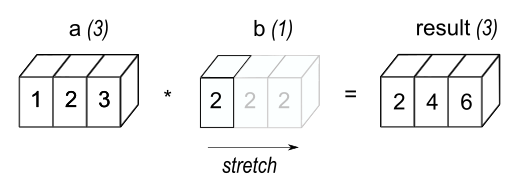

source: [NumPy User Guide](https://numpy.org/devdocs/user/basics.broadcasting.html#basics-broadcasting)

In the image we have a 1D array ```a``` of length 3 multiplied by a single scalar value ```b```. In this elementwise calculation, ```b``` is repeated over and over to match the shape of array ```a```. The stretching part of the calculation is the broadcasting. The stretching in the image above is only conceptual though because NumPy is smart enough to broadcast ```b``` to match the shape of ```a``` without actually making ```b``` into its own array. This means broadcasting is fast and memory efficient. The multiplication between ```a``` and ```b``` operates elementwise to return a result that is the same shape as array ```a```. All of this is happening automatically behind the scenes. Our code would look like:

In [ ]:
a = np.array([1, 2, 3])
b = 2
result = a * b
result

## With Two Arrays That Have the Same Rightmost Dimension

Broadcasting really comes in handy with multidimensional arrays. Imagine we have a 2D data array ```a``` with 4 rows and 3 columns and we need to add a different value to each column of that data. We have the data values we want to add to each column of ```a``` stored in a 1D array ```b``` which has a length of 3 (one value for each of the 3 columns of data array ```a```). Broadcasting makes this operation simple. Our 1D array ```b``` will automatically broadcast to each row of array ```a``` such that the addition will happen elementwise. Here's a visual of it.

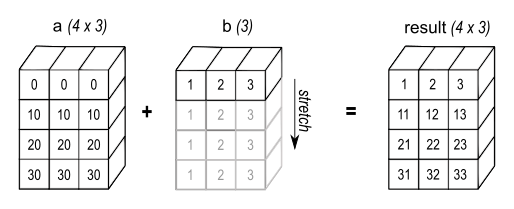

source: [NumPy User Guide](https://numpy.org/devdocs/user/basics.broadcasting.html#basics-broadcasting)

Our code would look like:

In [ ]:
a = np.array([[0,0,0],
              [10,10,10],
              [20,20,20],
              [30,30,30]])

b = np.array([1,2,3])

result = a + b
result

Now, this does not work for all arrays. Our array shapes need to be *compatible for broadcasting*. Notice above that the rightmost dimension of both ```a``` and ```b``` is length 3. ```a``` and ```b``` are compatible for broadcasting because their rightmost dimensions match. 

If we took array ```a``` from above with shape (4,3) and tried a broadcasting operation with an array that has an incompatible rightmost dimension like the 1D array ```b``` below of length 4, we would get an error. 
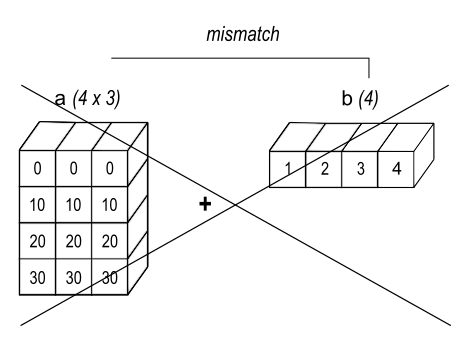

source: [NumPy User Guide](https://numpy.org/devdocs/user/basics.broadcasting.html#basics-broadcasting)

The code would look like:

In [ ]:
# let's try it, expect an error
b = np.array([1,2,3,4])
result = a * b

## With Two Arrays By Using a Singleton Dimension

For arrays to be compatible for broadcasting either their rightmost dimensions need to be the same length as we saw in the previous example OR one of the arrays needs to have the rightmost dimension of length 1. A dimension of length 1 is called a *singleton* dimension. We can create a singleton dimension with ```np.newaxis```. Here's an example:

In [ ]:
# create a 1D array of length 4
a = np.array([0,10,20,30])
print(a.shape)
a

In [ ]:
# turn the 1D array into a 2D array without adding any data values
a = a[:, np.newaxis]
print(a.shape)
a

Another way to look at this is that we turned a single row of data into a single column of data.

Now, we can broadcast a 1D array of any length with array ```a``` because of that singleton dimesion at the righmost axis. In this case, both arrays will be broadcast actually. Here's a visual example:

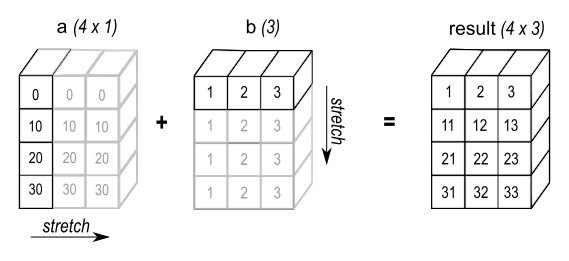

Our code would look like this:

In [ ]:
a = np.array([0,10,20,30])
b = np.array([1,2,3])
result = a + b
result

## An Application of Broadcasting

In climate science, it is common practice to compare gridded output from climate model simulations to gridded real world observations in order to test how realistic the model simulations are. For this example, let's assume that the grids of the model and observations are the same. For a variable like surface air temperature, before we can compare apples to apples we need to apply an altitude-based correction to the model data. This is because surface altitude in a climate model may be slightly different than surface altitude in the real world. As you may know, air temperature near Earth's surface decreases approximately 6.5 degrees Celsius for every 1000 meter increase in altitude, which is called the environmental or standard lapse rate. Here's a simple illustration.

<img src="images/numpy_lapseRate.png" alt="picture of a mountain showing decreasing temperature with altitude" width="400"/>

source: [UCAR Center for Science Education](https://scied.ucar.edu/learning-zone/atmosphere/change-atmosphere-altitude)

So, any difference in altitude between the climate model and the real world will require an adjustment to the model temperature data so that model temperature and real world temperature can be compared directly.

When we code this up, we will apply the altitude-based correction to the model data at every time step, which will involve broadcasting.

First, let's create pretend daily climate model 2-meter air temperature data for 4 days over a small 3x3 latitude/longitude grid.

In [178]:
# daily surface air temperature (C) data from a climate model
# dimensions (time, latitude, longitude), shape (4, 3, 3)

model_t2m = np.array([[[19.39, 10.30, 16.15],
                       [15.16, 19.78, 19.18],
                       [12.40, 12.97, 12.03]],
                      
                      [[29.39, 20.30, 26.15],
                       [25.16, 29.78, 29.18],
                       [22.40, 22.97, 22.03]],    
                      
                      [[19.39, 10.30, 16.15],
                       [15.16, 19.78, 19.18],
                       [12.40, 12.97, 12.03]],

                      [[ 9.39,  0.30,  6.15],
                       [ 5.16,  9.78,  9.18],
                       [ 2.40,  2.97,  2.03]]])

Now, we'll create pretend altitude data on the same 3x3 latitude/longitude grid. ```model_alt``` is the altitude from the climate model and ```real_alt``` is the real world altitude.

In [ ]:
# altitude (m) data for the 3x3 latitude/longitude grid

model_alt = np.array([[800.6,  399.7,  799.3],
                      [804.4,  901.2,  122.3],
                      [512.8,  619.1,  714.8]])

real_alt = np.array([[905.25,  425.48,  762.96],
                     [896.64,  971.76,  227.23],
                     [562.62,  641.23,  789.28]])

In [ ]:
# calculate the temperature adjustment needed
lapse_rate = .0065 # C/m
adj= lapse_rate * (real_alt - model_alt)
adj.shape

Because altitude doesn't change with time, the shape of the temperature adjustment array ```adj``` is 3x3, whereas the shape of the model temperature data that we want to apply the adjustment to ```model_t2m``` is 4x3x3.

We can use broadcasting to apply the temperature adjustment to every time step of the model temperature data.

In [ ]:
# use broadcasting to apply the correction
model_t2m_adj = model_t2m - adj
model_t2m_adj

Broadcasting allows us to very easily perform mathmatical operations between arrays with different, but compatible, dimensions. We don't need any loops or complex syntax. NumPy is smart enough to recognize that the last two dimensions of arrays ```adj``` and ```model_t2m``` match so it will repeat the ```adj``` array in order to apply the subtraction elementwise for all data values in ```model_t2m```. The resulting array ```model_t2m_adj``` is the same shape as ```model_t2m```.

If you often work with data that has dimensions time, latitude, longitude, you will probably use broadcasting along the time dimension like this example all the time. 

<div class="alert alert-info"> 

## Exercise 5: Broadcasting Practice

The array called ```data``` below contains data that needs to be multiplied by a set of scaling factors. A different scale factor should be applied to each column of the ```data``` array. 

Create a 1D array called ```scale_columns``` containing the pretend scale factors. Your ```scale_columns``` array can contain any values you want, but you will have to decide how many values it should contain to properly broadcast with the ```data``` array as described above. Then, do elementwise multiplication with the arrays using broadcasting to apply the scaling factors to the data.

</div>

In [ ]:
data = np.array([[10.2, 9.6, 12.3, 2.7, 5.5],
                 [21.3, 3.9, 8.4, 16.3, 1.1],
                 [17.6, 23.2, 20.1, 5.7, 19.4]])

In [ ]:
# add your code here

scale_columns = np.array([1,2,3,4,5])

data * scale

<div class="alert alert-info"> 

What if we wanted to apply a different scaling factor to each row instead of each column of the ```data``` array? 

Create a new array called ```scale_rows``` with the appropriate dimensions to broadcast a different scale factor to each row of the ```data``` array (hint: you'll need a singleton dimension). Multiply the arrays together to apply the scaling factors to the data using broadcasting. 

</div>

In [ ]:
# add your code here

scale_rows = np.array([[1],[2],[3]])
# OR
# scale_rows = np.array([1,2,3])
# scale_rows = scale_rows[:,np.newaxis]

print(scale_rows.shape)

data * scale

# VI. Comparison Operators, Logic Operators, and Logic Functions

## Comparison Operators

<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 30%; vertical-align: top;">
            <table border="1" style="border-collapse: collapse; width: 100%;">
                <tr><th>Comparison Operators</th></tr>
                <tr><td>Equal to ==</td></tr>
                <tr><td>Not equal to !=</td></tr>
                <tr><td>Greater than ></td></tr>
                <tr><td>Greater than or equal to >=</td></tr>
                <tr><td>Less than or equal to <=</td></tr>
            </table>
        </td>
        <td style="width: 70%; vertical-align: top; padding-left: 10px;">
            <p>



<br><br>As we saw in the Python Language Basics lesson, the result of using a comparison operator is boolean. For example, if the variable ```x``` equals 5, then the statement ```x < 10``` will evaluate to ```True```. We can use comparison operators on NumPy arrays too. Comparison operators evaluate elementwise and will return a boolean array of the same shape as the input. We saw this earlier in the section Advanced Indexing with Boolean Arrays.
            </p>
        </td>
    </tr>
</table>

In [ ]:
# reminder of what is in arr_2d
print(arr_2d)

# using a comparison operator on an array
arr_2d > 5

## Logic Operators and NumPy Logic Functions
<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 50%; vertical-align: top; padding-right: 10px;">
            <p>
                
<br><br>Now, a look at how to use logic operators and logic functions with NumPy arrays. First, here's how to use the logic operator ```&``` with two conditions.
            </p>
        </td>
        <td style="width: 50%; vertical-align: top;">
            <table border="1" style="border-collapse: collapse; width: 100%;text-align: center;">
                <tr>
                    <th>logic operators</th>
                    <th>logic functions</th>
                </tr>
                <tr>
                    <td>&</td>
                    <td>np.logical_and()</td>
                </tr>
                <tr>
                    <td>|</td>
                    <td>np.logical_or()</td>
                </tr>
                <tr>
                    <td>~</td>
                    <td>np.logical_not()</td>
                </tr>
            </table>
        </td>
    </tr>
</table>



In [ ]:
# using a logic operator with two conditions
(arr_2d > 5) & (arr_2d < 9)

As mentioned in the Python Language Basics lesson, parentheses around individual conditions are important. If you don't encase each condition in parentheses you may end up with incorrect results without a warning.

If you prefer, NumPy offers equivalent logic functions for ```&``` (```np.logical_and()```), ```|``` (```np.logical_or()```), and ```~``` (```np.logical_not()```).  

In [ ]:
# the equivalent with numpy logic function
np.logical_and(arr_2d>5, arr_2d<9)

Logic operators and NumPy logic functions offer broadcasting support.

In [180]:
# Define two arrays that are compatible for broadcasting
array1 = np.array([15, 0, 55])  # 1D array
array2 = np.array([[0, 20, 30], [40, 50, 60]]) # 2D array

# Use NumPy logic function with broadcasting
np.logical_and(array1 < 40, array2 > 25)

array([[False, False, False],
       [ True,  True, False]])

In [ ]:
# equivalent logic operator with broadcasting
(array1 < 40) & (array2 > 25)

## np.all() and np.any()

These logical functions can apply to an entire array, single, or multiple dimensions of an array. If applying these functions to an entire array the output is a single boolean, not a boolean array. 

In [ ]:
# 2D array input, single boolean output
print(np.all(array2 > 20))
print(np.any(array2 > 20))

What is happening above? First, the conditional statement ```array2 > 20``` is evaluated: each element of ```array2``` is compared to the value 20 and a boolean array of the same shape is returned. Then, ```np.all()``` let's us know whether all the values in the boolean array are True. If they are all True, the result is True. If not, the result is False. ```np.any()``` works the same way except when evaluating the values in the boolean array, it's looking for whether any value in the array is True.

If applying these functions along an array dimension(s), the output will be a boolean array of reduced shape.

In [181]:
# 2D array input, apply to each row (across columns)
# outputs an array with shape reduced appropriately
print(array2.shape)
result = np.all(array2 > 20, axis=1)
print(result.shape)
print(result)

(2, 3)
(2,)
[False  True]


We asked whether all values in each row are greater than 20, therefore the result will contain the answer to that question for each row. The shape of the result comes from the number of rows there are in the array.

# VII. Math Functions
## Aggregation and Summary Functions

NumPy offers all the usual aggregation and summary functions for arrays. These are simple statistics that can help us learn about our data.
- ```np.sum()```,
- ```np.mean()```,
- ```np.median()```,
- ```np.quantile()```
- ```np.min()```,
- ```np.max()```,
- ```np.var()```
- ```np.std()```

As well as some extras (this list is not exhaustive):
- ```np.ptp()``` calculates the data range
- ```np.percentile()``` calculates one or more percentiles

Additional similar NumPy functions as well as many more statistical and mathmatical functions can be found in the [NumPy API Reference Statistics page](https://numpy.org/doc/stable/reference/routines.statistics.html) and the [NumPy API Reference Mathmatical Functions page](https://numpy.org/doc/2.1/reference/routines.math.html). 

In general, these functions can apply to an entire array or to any particular dimension(s) of an array. For example, we could use ```np.mean()``` to get the average of all the values in a 3-dimensional array, or to get the average along a single dimesion, or multiple dimensions of the array.

Let's take a look using ```arr_2d```.

In [ ]:
# show arr_2d values
print(arr_2d)

# mean of entire array
np.mean(arr_2d)

If we don't give ```np.mean()``` a parameter called axis, NumPy assumes we want the mean of the entire array, so the result is a single value.

Notice how the result of ```np.mean()``` above is float64, which is different than the float16 data type of ```arr_2d```. Just something to be aware of, that any NumPy function may or may not output a different data type than its inputs.

If we want the average of each row or of each column, we would provide that information to the ```np.mean()``` function as a parameter.

In [ ]:
# mean of rows (average across columns in a row)
np.mean(arr_2d, axis=1)

In [ ]:
# mean of columns (average across rows in a column)
np.mean(arr_2d, axis=0)

Which axis to choose to get the results we want can be a little confusing. If we look at the [NumPy API Reference for ```np.mean()```](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) it says "computes the arithmetic mean along the specified axis" but this isn't super clear for beginners. 

Think about it this way. If we want an average value for each row of data, then we want to *average together all the columns* of each row. We want one value for each row, so in the result the columns disappear. The axis we would chose to get this result is axis 1 (the columns) because we want to *average columns together* so that *the columns dimension disappears* in the result. So, for an aggregation function like ```np.mean()```, "computes along the specified axis" means specify the axis that we want to disappear in the result.

Let's try a 3D example. We'll find the time-mean of ```arr_3d``` which means we want a mean value of all the data in space (latitude, longitude) at each time. Remember ```arr_3d``` has the shape (3, 3, 2) (time, latitude, longitude). We need to average all the data values together at each time step (there are 3x2=6 values at each time). We can visualize this by looking at back at the 3D image of ```arr_3d``` if we need to, each layer in the stack is what we are averaging together. In the result, we want one value for each of the 3 times in the stack, meaning that the latitude and longitude dimensions should disappear. Therefore, latitude (axis 1) and longitude (axis 2) are the dimensions that we need to specify using the axis parameter in ```np.mean()```. We can specify multiple dimensions with a tuple.

In [ ]:
# time-mean of 3D array with dims (time, latitude, longitude) 
np.mean(arr_3d,axis=(1,2)) # mean along multiple dimensions

All of the other aggregation and summary functions listed at the beginning of this section operate the same way with respect to providing (or not providing) the axis parameter.

<div class="alert alert-info"> 

## Exercise 6: Summary Functions

Use the NumPy API Reference Manual pages for **[np.median()](https://numpy.org/doc/stable/reference/generated/numpy.median.html#numpy.median)**, **[np.min()](https://numpy.org/doc/2.1/reference/generated/numpy.min.html#numpy.min)**, **[np.max()](https://numpy.org/doc/2.1/reference/generated/numpy.max.html#numpy.max)**, **[np.ptp()](https://numpy.org/doc/2.1/reference/generated/numpy.ptp.html#numpy.ptp)** if needed to help you complete the exercise.

Use ```arr_2d```, ```arr_3d```, and the functions linked above to execute the following tasks:

A) Find the median value of ```arr_2d```.
</div>

In [ ]:
# add your code here

np.median(arr_2d)

<div class="alert alert-info"> 

B) Find the minimum data value in each row of ```arr_2d```.
</div>

In [ ]:
np.min(arr_2d,axis=1)

<div class="alert alert-info"> 

C) Find the data range (max minus min) of ```arr_2d``` using ```np.ptp()```.
</div>

In [ ]:
np.ptp(arr_2d)

<div class="alert alert-info"> 

D) Find the data range of each column of ```arr_2d``` using ```np.ptp()```.
</div>

In [ ]:
np.ptp(arr_2d,axis=0)

<div class="alert alert-info"> 

E) Find the maximum data value in each time (axis 0) of ```arr_3d```.
</div>

In [ ]:
np.max(arr_3d,axis=(1,2))

## More Mathmatical Functions

NumPy offers many more mathematical functions, a few of which we'll cover here. See the [NumPy API Reference page for mathematical functions](https://numpy.org/doc/2.1/reference/routines.math.html) for additional functions.

- ```np.radians()``` convert degrees to radians
- ```np.cos()``` trigonometric cosine
- ```np.log()``` natural logarithm
- ```np.ceil()``` ceiling (next smallest integer rounding)
- ```np.trunc()``` truncation
- ```np.cumsum()``` cumulative sum
- ```np.diff()``` difference of elements along an axis
- ```np.sqrt()``` square root


In [182]:
# 1D array of angles in degrees
degrees = np.array([0,45,90,135,180])

# convert degrees to radians
rads = np.radians(degrees)
print('radians')
print(rads)

# calculate cosine
print('\ncosine')
print(np.cos(rads))

radians
[0.         0.78539816 1.57079633 2.35619449 3.14159265]

cosine
[ 1.00000000e+00  7.07106781e-01  6.12323400e-17 -7.07106781e-01
 -1.00000000e+00]


Notice how the functions are operating elementwise. Elementwise operations occur regardless of how many dimensions an array has. Here are examples using some of the other mathematical functions on a 2D array.    

In [183]:
# 2D array for demonstration
data_2d = np.array([[2.1,0.4],[100.3,6.2]])

# natural log
print('natural log')
print(np.log(data_2d))

# ceiling
print('\nceiling')
print(np.ceil(data_2d))

# truncation
print('\ntruncation')
print(np.trunc(data_2d))

natural log
[[ 0.74193734 -0.91629073]
 [ 4.60816569  1.82454929]]

ceiling
[[  3.   1.]
 [101.   7.]]

truncation
[[  2.   0.]
 [100.   6.]]


Now, we'll create a timeseries of daily precipitation at 4 latitude/longitude locations to illustrate how to use ```np.cumsum()``` for calculating the cumulative sum at each location over time.

In [ ]:
# precipitation data (mm/day) with dims (time,latitude,longitude)

pr = np.array([[[66.06, 97.4 ],
                [22.99, 84.13]],
               [[ 5.4 , 49.2 ],
                [ 0.28, 48.51]],
               [[95.57, 53.93],
                [48.67, 83.75]],
               [[86.1 , 78.48],
                [ 4.36, 63.73]],
               [[76.89, 25.84],
                [ 1.21, 87.8 ]]], dtype='float32')
print(pr.shape)

# accumulated pr at each lat/lon point
pr_acc = np.cumsum(pr,axis=0)
pr_acc

Axis 0 here represents time, so providing the parameter ```axis=0``` to the ```np.cumsum()``` function will calculate accumulated precipitation at each time step for each latitude/longitude location. To make the result easier to see we can pull out only the first latitide longitude location to look at.

In [ ]:
# look at the results for only the first lat/lon location
print('pr data for lat/lon index 0,0:  ',pr[:,0,0])
print('accumulated pr for lat/lon index 0,0:  ', pr_acc[:,0,0])

Maybe our precipitation data is provided to us as accumulated precipitation but we want to know the daily precipitation amount. We can use the ```np.diff()``` function to calculate the difference between consecutive elements.

In [ ]:
# timeseries of accumulated precip
accpr = np.array([1.0, 2.25, 3.75, 6.0, 10.5])

# difference between steps in the timeseries
diff = np.diff(accpr)
diff

The result is ```diff[i]``` = ```accpr[i+1]``` - ```accpr[i]```.

We could also prepend the timeseries with a zero. (To see all the possible parameters look at the [NumPy API Reference for ```np.diff()```](https://numpy.org/doc/2.1/reference/generated/numpy.diff.html#numpy.diff))

In [ ]:
# difference between steps in the timeseries prepended by zero
diff = np.diff(accpr, prepend = 0)
diff

In this case the result is ```diff[i]``` = ```accpr[i]``` - ```accpr[i-1]```

Remember, that NumPy will be fastest if we avoid looping and instead use NumPy functions. So, while we could calculate ```diff``` by looping through our array, it's not advisable to do so. **If you find yourself looping through a NumPy array to calculate something, it's best to do a web search or turn to the NumPy documentation to see if there is a NumPy function you can use instead of looping.**

<div class="alert alert-info"> 

## Exercise 7: Mathmatical Functions

Use the NumPy API Reference Manual pages for **[np.sin()](https://numpy.org/doc/2.1/reference/generated/numpy.sin.html#numpy.sin)**, **[np.floor()](https://numpy.org/doc/2.1/reference/generated/numpy.floor.html#numpy.floor)**, **[np.round()](https://numpy.org/doc/2.1/reference/generated/numpy.round.html#numpy.round)** to help you complete the following tasks.

A) Calculate the trigonometric sine of the ```degrees``` array. Hint: you'll see in the documentation for ```np.sin()``` that the inputs need to be in radians.
</div>

In [ ]:
degrees = np.array([0,45,90,135,180])

# add your code here
np.sin(np.radians(degrees))

<div class="alert alert-info"> 

B) Calculate the floor of each value in the ```data_2d``` array.
</div>

In [ ]:
data_2d = np.array([[2.16936,0.46812],[100.37213,6.21455]])

# add your code here
np.floor(data_2d)

<div class="alert alert-info"> 

C) Round each value in the ```data_2d``` array to 2 decimal places.

In [ ]:
data_2d = np.array([[2.16936,0.46812],[100.37213,6.21455]])

# add your code here
np.round(data_2d,decimals=2)

# VIII. Array Creation Functions

There are a lot of ways besides ```np.array()``` to create or initialize NumPy arrays. We'll cover some of the most useful functions in this section.

- ```np.zeros()``` array initialized with zeros
- ```np.ones()``` array initialized with ones
- ```np.full()```  array initialized to any value we want
- ```np.empty()``` uninitialized array
- ```np.arange()``` array of evenly spaced integers
- ```np.linspace()``` array of evenly spaced floats
- ```np.random.default_rng()``` creates a random number generator object
- ```np.rng.random()``` uses a random number generator to create an array of random floats in the half-open interval [0.0, 1.0)
- ```np.rng.uniform()``` uses a random number generator to create an array of random floats in the half-open interval of your choice
- ```np.rng.integers()``` uses a random number generator to create an array of random integers


## Create Arrays Initialized to a Single Value
The first few of these functions take a shape as input and return an array filled with zeros, ones, or a missing value.

In [ ]:
# 1D array of zeros
print(np.zeros((10,)))

# 2D array of ones
print(np.ones((2,3), dtype = 'int8'))

# 1D array filled with any value you want
print(np.full(arr_1d.shape, np.nan))

Notice above that instead of typing the tuple for the input shape we can also use the ```.shape``` attribute to grab the shape tuple from an array that we've already created.

## Create Arrays Uninitialized

```np.empty()``` will create an array of the shape specified and fill it with whatever values NumPy finds in memory. Because these values will almost always be different, this is considered an *unitialized* array, meaning we are not initializing to any particular value but also the values are not totally random. If you're following along with the video for this lesson, your output below will likely look different than the instructor's, but that is expected behavior. 

In [ ]:
# 2D array without a specified initialization value
print(np.empty(arr_2d.shape, dtype = 'float32'))

In general, we would use ```np.empty()``` when we plan on immediately overwriting all the unitialized values with something else. The benefit of this function is that it can be slightly faster than ```np.zeros()```, ```np.ones()```, and ```np.full()```. If you aren't working with large data though, this small potential speed increase will not be a concern.

We can fill an entire array with a specific value after we've created it with syntax like this:

In [ ]:
# 2D array without a specified initialization value
myArr = np.empty(arr_2d.shape, dtype = 'float32')

# initialization value
myArr[:] = np.nan
myArr

## Create Arrays of Integer and Float Sequences

To create an array containing an evenly spaced sequence of integers (as opposed to a range object like we saw with Python ```range()``` in a previous lesson), we can use ```np.arange()```. This function takes various parameters as input. If we input a single integer parameter, it will be interpreted as the exclusive stop value. If we input two integer parameters, they will be interpreted as the inclusive start and exclusive stop. If we input three integer parameters, they will be interpreted as the inclusive start, exclusive stop, and step. See the [NumPy API Reference for ```np.arange()```](https://numpy.org/doc/2.1/reference/generated/numpy.arange.html) for more information.

In [ ]:
# create array with integer sequence
# parameter: exclusive stop
print(np.arange(10))

# create array with integer sequence
# parameters: inclusive start, exclusive stop
print(np.arange(2,10))

# create array with integer sequence
# parameters: inclusive start, exclusive stop, step
print(np.arange(2,10,2))

To create an array containing an evenly spaced sequence of float values, we can use ```np.linspace(start,stop,num)```. Default behavior is that the stop value is **inclusive** but we can force it to be exclusive with the parameter ```endpoint=False```.

In [184]:
# create float sequence
print(np.linspace(0,10,21))
print(np.linspace(0,10,21).shape)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]
(21,)


In [185]:
# using the endpoint parameter
print(np.linspace(0,10,20,endpoint=False))
print(np.linspace(0,10,20,endpoint=False).shape)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
(20,)


## Create Arrays of Random Numbers with a Random Number Generator

The final thing we'll cover in this section is how to create arrays of random numbers. Arrays of random numbers are important for implementing certain statistical techniques. 

First, we need to create a random number generator (rng) object. Then, we can use that rng object to generate arrays of random numbers.

In [ ]:
# first, create a random number generator object

rng = np.random.default_rng()
rng

Now we can create arrays of random numbers using the rng object. Using the function ```.random(shape)``` on a random number generator object will return random floats in the half-open interval [0.0, 1.0).

In [ ]:
# 1D array of random floats
print(rng.random(10))

# 1D array of random floats
print(rng.random(10))

Notice how each random array generated is different. We'll cover how to generate the same array of random numbers in a minute.

We can generate random float arrays of any shape we want.

In [186]:
# 2D array of random floats
print(rng.random((2,3)))

[[0.3439275  0.2925195  0.01574277]
 [0.19451692 0.80578305 0.7807256 ]]


If we want a random array of floats in a half-open interval other than [0.0, 1.0), we can use ```.uniform(low,high,shape)```.

In [187]:
print(rng.uniform(1,100,(4,4)))

[[10.93714719 77.52069401 68.21898037 11.35622771]
 [78.62764412 35.88490075 73.32969982 76.68538933]
 [25.51238268  1.05487893 38.4244718  37.10417004]
 [74.99086358 94.04406905 54.2395338  57.82855186]]


If we want a random array of integers we can use ```.integers(low,high,shape)``` on our random number generator object.

In [188]:
print(rng.integers(1,20,(4,4)))

[[18  9  6  7]
 [14 10  7 15]
 [10  5 18  7]
 [ 8  7  8 18]]


If we wanted to generate the same random array of numbers multiple times, we would have to create a new random number generator object with the same *seed* each time we generate an array. The seed will ensure that, for example, an array of length 5 will always contain the same 5 random numbers.

In [ ]:
seed = 10

# 1D array of random floats
print(np.random.default_rng(seed=seed).random(5))

# generate the same 1D array of random floats
print(np.random.default_rng(seed=seed).random(5))

<div class="alert alert-info"> 

## Exercise 8: Array Creation Functions

Use the NumPy array creation functions described in this section to complete the following tasks.

A) Create a 2D array with 5 rows and 4 columns where all the data values are -9999.0.

</div>

In [ ]:
# add your code here

np.full((5,4),-9999.0)

<div class="alert alert-info"> 

B) Create a 1D array of northern hemisphere latitudes with 1/4 degree spatial resolution starting at 30.0 degrees and ending at 60.0 degrees. 
</div>

In [ ]:
# add your code here

np.linspace(30,60,121)

<div class="alert alert-info"> 

C) Create a random number generator and use it to create an array with 5 rows and 3 columns filled with random integer values from 1 to 100.
</div>

In [ ]:
# add your code here

np.random.default_rng().integers(1,100,(5,3))

# IX. Sorting, Searching, and Counting Functions

We'll cover the following NumPy sorting, searching, and counting functions. For additional functions see the [NumPy API Reference page for sorting, searching, and counting](https://numpy.org/doc/stable/reference/routines.sort.html#sorting-searching-and-counting).

- ```np.sort()```
- ```np.argsort()```
- ```np.where()```
- ```np.unique()```

## Sorting

```np.sort()``` is the function to use for sorting along an axis. For multidimensional arrays, sorting happens along the rightmost axis by default unless we indicate otherwise with the axis parameter.

In [ ]:
# create arrays for demonstration

arr_1d = np.array([5,2,6,7,3,8,1,9,4,10,0])

arr_2d = np.array([[5,2,6,7,3,8,1,9,4,10,0],
                   [3,2,10,0,5,8,1,9,4,6,7]])

arr_3d = np.array([[[5,2,6,7,3,8,1,9,4,10,0],
                   [3,2,10,0,5,8,1,9,4,6,7]],
                  [[5,2,6,7,3,8,1,9,4,10,0],
                   [3,2,10,0,5,8,1,9,4,6,7]],
                  [[5,2,6,7,3,8,1,9,4,10,0],
                   [3,2,10,0,5,8,1,9,4,6,7]]])

In [ ]:
# 1D example
np.sort(arr_1d)

In [ ]:
# 2D example, sorting across columns
# (each row will contain sorted values)
np.sort(arr_2d,axis=1)

In [ ]:
# 2D example, sort across default axis
np.sort(arr_2d)

Notice, that by not providing the axis parameter we are asking ```np.sort()``` to use the default sorting behaviour, which is to sort along the rightmost axis (columns). Because ```arr_2d``` is 2-dimensional, this result is identical to the previous result where we specified ```axis=1```

In [ ]:
# 3D example, sort across default axis
np.sort(arr_3d)

Again, the default behavior sorts along the rightmost axis (across columns, in this case axis 2), so the result is that each row in each level of the stack contains sorted values (the columns get sorted). 

If we want to sort an array by another array, we can use ```np.argsort()```. To demonstrate this function we'll use a potential application.  

Let's pretend we have monthly mean temperature (F) from 10 different weather stations. We have these data stored in an array of shape (10,12) where each row is a different weather station and each column is a the mean temperature for a different month. 

In [2]:
t_mon = np.array([
 [39.02, 46.58, 53.02, 67.46, 77.70, 87.05, 91.73, 86.88, 78.14, 68.03, 52.94, 42.55],  # Las Vegas, station 100441
 [32.87, 33.24, 44.52, 52.60, 63.07, 77.38, 86.79, 80.60, 67.25, 60.35, 45.64, 32.50],  # Denver, station 100550
 [25.85, 29.41, 40.77, 48.34, 61.48, 71.98, 80.74, 73.79, 68.32, 53.36, 39.11, 31.58],  # Boston, station 100105
 [32.69, 37.63, 47.02, 52.47, 66.94, 77.12, 78.10, 77.97, 68.91, 56.97, 46.16, 35.59],  # NYC, station 100489
 [39.49, 44.85, 49.80, 56.81, 65.21, 74.73, 80.95, 75.09, 69.36, 60.90, 50.33, 47.40],  # Sacramento, station 100472
 [21.18, 24.31, 37.95, 50.16, 61.20, 72.38, 76.71, 76.00, 65.36, 54.25, 39.67, 30.56],  # Chicago, station 100872
 [47.39, 53.20, 52.34, 60.93, 60.49, 66.80, 68.82, 67.85, 65.02, 57.91, 52.14, 49.91],  # San Francisco, station 100514
 [37.13, 43.00, 52.34, 61.52, 72.23, 77.02, 83.13, 78.90, 74.37, 62.47, 52.82, 38.80],  # Charlotte, station 100111
 [57.68, 61.94, 65.26, 65.59, 74.52, 74.31, 75.95, 77.25, 77.32, 68.11, 63.24, 59.42],  # Los Angeles, station 100546
 [51.87, 57.80, 65.26, 73.61, 80.79, 86.59, 88.84, 89.54, 81.14, 75.56, 65.68, 54.30]])  # Austin, station 100646

We have separate arrays containing latitude, longitude, and elevation information for each weather station.

In [3]:
station_number = np.array([100441, 100550, 100105, 100489, 100472, 100872, 100514, 100111, 100546, 100646])
station_lat = np.array([36.16, 39.74, 42.36, 40.71, 38.58, 41.88, 37.77, 35.23, 34.05, 30.27])
station_lon = np.array([-115.15, -104.99, -71.06, -74.01, -121.49, -87.63, -122.42, -80.84, -118.25, -97.74])
station_elev = np.array([ 610, 1609, 43, 10, 9, 181, 16, 229, 71, 149])

We can sort the rows of our temperature data by increasing latitude using ```np.argsort()```. First, we'll create an array of indexes that describe how to sort ```station_lat``` from lowest to highest latitude.

In [ ]:
# use np.argsort() to get the indices of the sort order 
sorted_lat = np.argsort(station_lat)
sorted_lat

The values in ```sorted_lat``` indicate how we would sort ```station_lat``` to order the latitudes from lowest to highest. For example, the results tell us that the 9th index of ```station_lat``` is the lowest latitude (Austin), the 8th index of ```station_lat``` is the second lowest latitude (Los Angeles), etc, etc, through to the highest latitude which is index 2 of ```station_lat``` (Boston).

If we wanted to double check that ```sorted_lat``` is correct we can use advanced indexing (using an array as an indexer to another array). This should look familiar to things we covered in the advanced indexing section.

In [ ]:
# show latitudes sorted ascending
station_lat[sorted_lat]

We can use advanced indexing to sort other arrays by using the ```sorted_lat``` array as an indexer.

Sorting ```station_number``` by latitude:

In [ ]:
# station numbers sorted by latitude
station_number[sorted_lat]

We saw that Austin is the lowest latitude and Boston is the highest latitude. We can double check ourselves by verifying that the first number in this result matches the station number for Austin and the last number matches the station number for Boston.

We can also sort the 2D temperature array by latitude with advanced indexing. The following will reorder our data rows so that the first row of temperature data comes from the station with the lowest latitude (Austin), the last row of data comes from the station with the highest latitude (Boston), and the rows in between are sorted appropriately by ascending station latitude.

In [ ]:
# temperature data sorted by station latitude
t_mon[sorted_lat]

<div class="alert alert-info"> 

## Exercise 9: np.sort() and np.argsort()

A) Sort the Denver row of the ```t_mon``` array.
</div>

In [ ]:
# add your code here

np.sort(t_mon[1,:])

<div class="alert alert-info"> 

    
B) Sort all rows of the ```t_mon``` array by ascending station elevation.
</div>

In [ ]:
# add your code here

sorted_elev = np.argsort(station_elev)
t_mon[sorted_elev]

<div class="alert alert-info"> 
    
C) Sort all rows of the ```t_mon``` array by descending station elevation. Hint: Use basic indexing to reverse your sorted elevations (or do a web search for how to reverse the order of an array using another NumPy function we haven't covered).
</div>

In [ ]:
# add your code here

sorted_elev = np.argsort(station_elev)[::-1]
# sorted_elev = np.flip(np.argsort(station_elev))
t_mon[sorted_elev]

## Searching

Any code written for data analysis with NumPy will probably use ```np.where()``` at some point. This is a powerful function that you will almost certainly use often. It is used to find, select, or find and replace elements in arrays that meet specified conditions.

We'll go through some examples of how to use ```np.where()``` using the pretend weather data and station information arrays we created above.

First, if we provide a conditional statement as a parameter to ```np.where()```, what is returned is a tuple with an array(s) of the indexes where that condition is True.

In [23]:
# reminder of what's in station_elev
print(station_elev)

# find elements in station_elev greater than 500m
np.where(station_elev > 500)

[ 610 1609   43   10    9  181   16  229   71  149]


(array([0, 1]),)

We can also use the array of indexes that is returned from ```np.where()``` to select elements where the condition is True and hold them in a new array.

In [24]:
# find elements in station_elev greater than 500m
indices = np.where(station_elev > 500)

# create new array with selected elements
elev_subset = station_elev[indices] # advanced indexing
elev_subset

array([ 610, 1609])

We can find or find and select with more than one condition. Be sure to put parentheses around each condition.

In [25]:
# find elements in station_elev greater than 500m and less than 1000m
indices = np.where((station_elev > 100) & (station_elev<1000))

# create new array with selected elements
elev_subset = station_elev[indices] # advanced indexing
elev_subset

array([610, 181, 229, 149])

We can find an replace elements in an array by providing more inputs: ```np.where(condition, value if True, value if False)```

In [26]:
# reminder of what's in station_elev
print(station_elev)

# replace elements greater than 1000 with 1000
np.where(station_elev>1000, 1000, station_elev)

[ 610 1609   43   10    9  181   16  229   71  149]


array([ 610, 1000,   43,   10,    9,  181,   16,  229,   71,  149])

In words, the above ```np.where()``` statement would be "where station_elev values are greater than 1000, replace with 1000, otherwise keep the station_elev value the same".

Something you may do frequently is use ```np.where()``` to create a 0/1 mask.

In [27]:
# find and replace elements >= 500 with 1
# replace all other elements with 0
mask = np.where(station_elev>=500,1,0)
mask

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

<div class="alert alert-info"> 

## Exercise 10: Using np.where() with Mutliple Array Inputs

Imagine you are working with gridded output from a land surface model (such as the [VIC model](https://vic.readthedocs.io/en/master/Overview/ModelOverview/)). You have the following data on the same grid:

var name | units | description | shape | axes represent
---|---|---|---|---
landfrac | unitless | fraction of each grid cell that is land<br>(1. minus landfrac is grid cell water fraction) | (5,5) | latitude and longitude
t2m | C | 2-meter air temperature | (5,5) | latitude and longitude

<br>

A) Create an array called ```landmask``` of zero's and one's from the array of land fractions below. In your ```landmask``` array, one's should represent grid cells that are mostly land (at least 50%) and zero's should represent grid cells that are mostly water. Print your results.

</div>

In [ ]:
landfrac = np.array([[1.,.98,.97,1.,.96],
                     [.92,.97,1.,.96,.98],
                     [.88,.7,.82,.9,1.],
                     [.6,.49,.5,.63,.8],
                     [.12,0.,0.,.25,.3]])

# add your code here
landmask = np.where(landfrac>=.5,1,0)
landmask

<div class="alert alert-info"> 

B) Imagine you have a calculation that you want to execute differently based on whether each grid is mostly land or mostly water. Use ```np.where()``` to add 1 degree C to the array ```t2m``` for grids that are mostly water and add 3 degrees C for grids that are mostly land. Save your result as a new variable ```t2m_adj``` and print the result.

In [ ]:
t2m = np.array([[26,27,28,29,30],
                [26,27,28,29,30],
                [26,27,28,29,30],
                [26,27,28,29,30],
                [26,27,28,29,30]])

# add your code here

t2m_adj = np.where(landmask==1,t2m+3,t2m+1)
t2m_adj

## Counting

A function that is particularly useful, especially for debugging and checking yourself as you write your code is ```np.unique()```. This function can show us all the unique values in an array and optionally return the count of each value as well.

Imagine we downloaded a landcover dataset from the web. The metadata on the website we downloaded it from said the data has 7 landcover classes 1 through 7. Before we get too far into any analysis using this data, we may want to verify that there are indeed only 7 different values in the dataset. We can use ```np.unique()``` to see all the data values present in our data.

In [ ]:
# landcover data that should have only classes 1-7
lc_class = np.array([[1.,1.,1.,2.,2.],
                    [3.,4.,4.,18.,4.],
                    [5.,5.,6.,6.,6.],
                    [7.,7.,7.,12.,7.]])

np.unique(lc_class)                    

Now, we can clearly see that the ```lc_class``` array contains more than the values 1-7, but imagine how helpful this function would be if our ```lc_class``` array was much larger.

We can optionally return the count of each value by including an additional parameter.

In [ ]:
np.unique(lc_class,return_counts=True)

Seems like we should do a little data cleaning since our data contains values that it shouldn't. Let's replace any number that's not 1-7 with ```np.nan``` to indicate missing or spurious data values.

In [ ]:
# clean data using np.where()
lc_class = np.where(lc_class>7,np.nan,lc_class)

# double check ourselves that the data cleaning worked correctly
np.unique(lc_class,return_counts=True)

We can see the same counts for values 1-7 as before as well as a count of 2 NaNs. 

As you are writing your data analysis code it can be very beneficial to include little checks like this to discover problems with your code that may not be producing errors. For example, if we had written the condition incorrectly in the ```np.where()``` function we may have never noticed if we hadn't used ```np.unique()``` (or some other self-check method like data visualization) to double check our results.

# X. Handling Missing Values

Real world datasets often have at least some missing data. The placeholder or value used to indicate missing data varies depending on data source, data type, and data file format. Integer datasets often use a number like -9999 to indicate missing data. Float datasets often use NaN ("not a number"). NumPy NaN is written as ```np.nan```. We've seen this briefly above. In this section we'll learn how to find, count, and replace missing and infinite data values in NumPy arrays.

To find NaNs in a NumPy array we can use the ```np.isnan()``` function which will return a boolean array.

In [6]:
# create an array
data = np.array([1.0,np.nan,3.5,4.2,np.nan,np.inf,8.1,0])

# determine NaN or not NaN
np.isnan(data)

array([False,  True, False, False,  True, False, False, False])

We can count the number of NaNs in an array by summing the result of ```np.isnan()```

In [7]:
# count NaNs
print(np.isnan(data).sum())

2


We can convert all NaNs to a finite data value.

In [8]:
# fill NaNs with -9999.

data = np.where(np.isnan(data),-9999.,data) # using np.where()
# data[np.isnan(data)] = -9999.  # the equivalent using advanced indexing

data

array([ 1.000e+00, -9.999e+03,  3.500e+00,  4.200e+00, -9.999e+03,
              inf,  8.100e+00,  0.000e+00])

Or do the reverse where we fill finite data values with NaN.

In [9]:
# fill -9999. with NaN

data = np.where(data==-9999.,np.nan,data)  # using np.where()
# data[data==-9999.] = np.nan   # the equivalent using advanced indexing

data

array([1. , nan, 3.5, 4.2, nan, inf, 8.1, 0. ])

```np.isfinite()``` is used for similar purposes as ```np.isnan()``` but it will evaluate to True for values in our data that are not NaN or Inf. In other words, it will determine if each element is finite or not and return a boolean array.  

In [10]:
# determine finite or non-finite
np.isfinite(data)

array([ True, False,  True,  True, False, False,  True,  True])

To identify the NaN and Inf values with True we can simply use the boolean operator ```~``` (not).

In [11]:
# determine finite or non-finite
~np.isfinite(data)

array([False,  True, False, False,  True,  True, False, False])

We can replace all NaN and Inf values in an array with ```np.nan_to_num()```. Here we'll replace NaN with 0 and Inf with 1000000.

In [12]:
# replacing NaN and Inf with finite values
np.nan_to_num(data, nan=0., posinf=1E6)

array([1.0e+00, 0.0e+00, 3.5e+00, 4.2e+00, 0.0e+00, 1.0e+06, 8.1e+00,
       0.0e+00])

What if we want to replace NaN and Inf values in our data in a more sophisticated manner than simply filling all NaN to the same finite value and all Inf to the same finite value? Imagine we have a timeseries of data and want to fill both NaN and Inf values by copying the preceding finite value in the timeseries. Here's how we could do it.

In [29]:
# fill NaN and Inf with the preceding finite value

while np.any(~np.isfinite(data)):
    not_finite = np.where(~np.isfinite(data)) # find indexes of non-finite data
    data[not_finite] = data[not_finite[0] - 1] # fill non-finite with the preceding data value
    
data

array([1. , 1. , 3.5, 4.2, 4.2, 4.2, 8.1, 0. ])

To accomplish the task, the small block of code above uses a while loop, three NumPy functions which we have covered in this notebook, and advanced indexing.

While there are any data values that are non-finite, find the indexes of those values, then replace those values with the preceding index's data value. In the case that there are back to back values that are non-finite, one pass through the loop won't be enough to fill all non finite values with finite values (because the preceding non-finite value will be propagated forward). This is why we use a while loop which tests if there are any non-finite values present and then if True repeats the filling process.

The last thing we'll cover in this section is what happens if we try to use ```np.nan``` as a missing value in an integer array. ```np.nan``` has a float data type. NumPy doesn't have a specific value like ```np.nan``` to represent missing values in integer data. For this reason, if we have an integer data array and fill any of the values with ```np.nan```, NumPy will either throw an error or automatically convert our array to float. It's just something to be aware of.

In [ ]:
# create an integer array
data = np.array([1,2,-9999,3,4,5,-9999],dtype='int32')

# int to NaN using advanced indexing throws error
data[data==-9999] = np.nan
data

In [ ]:
# int to NaN using np.where() coverts int data to float
data = np.where(data==-9999,np.nan,data)
print(data.dtype)
data

<div class="alert alert-info"> 

## Exercise 11: Practice Handling NaN

You have the follow 2D array called ```data``` that should contain only float values ranging from -100 to +100. Execute the following data cleaning steps using techniques you've learned in this and previous sections.

A) Programmatically count how many missing values (NaN) are present in the data.

</div>

In [30]:
data = np.array([[1.,2.,np.nan,4.,5.],
                 [-9999.,-999.,3.5,10.7,99.9],
                 [-99.9, np.inf, -60.2,-np.inf,83.3]], dtype=np.float32)

# add your code here

print(np.isnan(data).sum())

array([[ 1.000e+00,  2.000e+00,        nan,  4.000e+00,  5.000e+00],
       [-9.999e+03, -9.990e+02,  3.500e+00,  1.070e+01,  9.990e+01],
       [-9.990e+01,        inf, -6.020e+01,       -inf,  8.330e+01]],
      dtype=float32)

<div class="alert alert-info"> 

B) Programmatically count how many values in the data are non-finite (NaN and Inf).
</div>

In [35]:
# add your code here

print((~np.isfinite(data)).sum())

3


<div class="alert alert-info"> 
C) Programmatically count how many values are finite but not within the data range -100 to +100. Hint: this will require the use of multiple conditions.
</div>

In [46]:
# add your code here

print(( (np.isfinite(data)) & ((data>100) | (data<-100)) ).sum())
print(np.where( (np.isfinite(data)) & ((data>100) | (data<-100)), 1, 0).sum())

0
0


<div class="alert alert-info"> 
D) Replace all data values that are not within the data range with the missing value ```np.nan```.
</div>

In [41]:
# add your code here

data = np.where((data>100) | (data<-100), np.nan, data)
data

array([[  1. ,   2. ,   nan,   4. ,   5. ],
       [  nan,   nan,   3.5,  10.7,  99.9],
       [-99.9,   nan, -60.2,   nan,  83.3]], dtype=float32)

<div class="alert alert-info"> 
    
E) Select only the finite values and save them to a new variable called ```data_clean```.
</div>

In [42]:
# add your code here

finite = np.where(np.isfinite(data))
data_clean = data[finite]
data_clean

array([  1. ,   2. ,   4. ,   5. ,   3.5,  10.7,  99.9, -99.9, -60.2,
        83.3], dtype=float32)

<div class="alert alert-info"> 
    
E) Fill all NaNs in the ```data``` array with zero.
</div>

In [44]:
# add your code here

data = np.where(np.isnan(data), 0, data)
data

array([[  1. ,   2. ,   0. ,   4. ,   5. ],
       [  0. ,   0. ,   3.5,  10.7,  99.9],
       [-99.9,   0. , -60.2,   0. ,  83.3]], dtype=float32)

# XI. Input/Output (I/O) with NumPy

Up to this point in this notebook we've been learning how to work with NumPy arrays by creating them from scratch as opposed to reading data from a file into a NumPy array. In this section we will cover how to read data from a file into a NumPy array, how to write a NumPy array to a file, and what types of files NumPy can read/write from/to.

NumPy can read/write 1D and 2D arrays from/to plain text file formats like .txt, .dat, and .csv files. We'll cover how to do this, but in practice it's often easier to use Pandas to read and write from/to plain text files. We'll cover how to convert between NumPy and Pandas data structures here too.

NumPy's native format for saving arrays of any dimension to your computer is a binary file with a .npy or .npz extension. We can write a single NumPy array to a .npy file or we can write mutliple NumPy arrays to .npz (a zipped archive of multiple .npy files). 

Let's start by reading the plain text data file ```data/NOAA_ClimateIndex/NOAAClimateIndex_Nino34.txt```. The file was obtained online from the NOAA Physical Sciences Laboratory webpage of climate indices [https://psl.noaa.gov/data/climateindices/list/](https://psl.noaa.gov/data/climateindices/list/). It contains monthly values of the Nino 3.4 Index from 1948 to 2024. The Nino 3.4 climate index is the mean monthly sea surface temperature over a particular area in the equatorial Pacific ocean which can indicate whether the Earth is experiencing El Nino or La Nina climate conditions. We'll learn more about the El Nino Southern Oscillation (ENSO) climate pattern and work more with this data in a subsequent lesson. But for now, we'll use the data file to practice input/output with NumPy tools.   

## Read Data with No Missing Values ("Holes") from a Plain Text File

We can use ```np.loadtxt()``` to load data with no missing values from a plain text file into a NumPy array. Our data file has a .txt extension but this also applies to other plain text files like .dat or .csv.  "Missing values" here means no "holes" in the data. Particular values that indicate missing data (like NaN) are ok, but empty spaces to indicate missing values are not ok with ```np.loadtxt()```. Before we proceed, go to the data folder and open the ```NOAAClimateIndex_Nino34.txt``` file to see what is inside. The file is formatted like: 

```
year1 yearN
year1 janval febval marval aprval mayval junval julval augval sepval octval novval decval
year2 janval febval marval aprval mayval junval julval augval sepval octval novval decval
...
yearN janval febval marval aprval mayval junval julval augval sepval octval novval decval
  missing_value
  additional lines of metadata
```  
Data values are separated by one or more spaces, all missing data is indicated with the value -99.99, and there is one row at the top (year1 yearN) and at least two rows at the bottom (missing_value and additional metadata) that shouldn't be read into our NumPy array.

In [ ]:
# read file into an array
# exclude non-data rows with skiprows, maxrows
nino = np.loadtxt('data/NOAA_ClimateIndex/NOAAClimateIndex_Nino34.txt',
                  skiprows=1,
                  max_rows=77,
                  dtype='float32')
print(nino.shape)
nino[:5,:]

The first column of this array (year) is like an index as opposed to a data value so it would make sense to copy the year into its own array and delete the year from the nino array. We'll also replace the missing value -99.99 with ```np.nan```. 

In [ ]:
# copy year into its own array
year = nino[:,0].astype('int32')

# remove year from the nino array
nino = nino[:,1:]

# fill missing value with NaN
nino = np.where(nino==-99.99,np.nan,nino)

# see result
print('year\n',year)
print(year.shape)
print('nino data\n',nino[:5,:])
print(nino.shape)

We now have NumPy data arrays ```year``` and ```nino``` that are ready to work with.

## Read Data with Missing Values ("Holes") from a Plain Text File

If the plain text data file contains empty spaces for missing data we must use ```np.genfromtxt()``` to read the file because ```np.loadtxt()``` will throw an error. The file ```data/NOAA_ClimateIndex/NOAAClimateIndex_Nino34.csv``` is the .csv equivalent of the .txt file we read above. You can go to the data folder and open the .csv file to see its contents. Inside you will find:

```
colname,colname,colname,colname,colname,colname,colname,colname,colname,colname,colname,colname,colname
year1,janval,febval,marval,aprval,mayval,junval,julval,augval,sepval,octval,novval,decval
year2,janval,febval,marval,aprval,mayval,junval,julval,augval,sepval,octval,novval,decval
...
yearN,janval,febval,marval,aprval,mayval,junval,julval,augval,sepval,octval,novval,decval
additional lines of metadata
```  
Data values are separated by a comma, all missing data is indicated with no value at all, and there is a header row at the top and metadata rows at the bottom that shouldn't be read into a NumPy array. We must use ```np.genfromtxt()``` to read this file with NumPy.

In [ ]:
# read file into an array
# exclude non-data rows with skip_header, skip_footer
# specify the comma delimiter
nino = np.genfromtxt('data/NOAA_ClimateIndex/NOAAClimateIndex_Nino34.csv',
                     skip_header=1,
                     skip_footer=3,
                     delimiter=',',
                     dtype='float32')
print(nino.shape)
nino[:5,:]

```np.genfromtxt()``` automatically converts empty space to NaN for us, similar to the way ```pandas.read_csv()``` works. We can separate out the year from the data values in the same way we did before.

In [ ]:
# copy year into its own array
year = nino[:,0].astype('int32')

# remove year from the nino array
nino = nino[:,1:]

# see result
print('year\n',year)
print(year.shape)
print('nino data\n',nino[:5,:])
print(nino.shape)

## Write Data to Plain Text File

We can use ```np.savetxt()``` to write 1D or 2D arrays to a plain text file.

In [ ]:
# write data to csv file
np.savetxt('np_practice_nino34.csv', nino, delimiter=',', fmt='%.2f')

The [NumPy API Reference page for ```np.savetxt()```](https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html) explains the components of the ```fmt``` (format) parameter. The format above of ```'%.2f'``` means write each data value as a floating point number with 2 decimal places. 

Open the ```np_practice_nino34.csv``` file to check out what's inside. It's just the data values (12 months per row), no header, no footer, no years, and the missing values are written to file as NaN. We could include a header and/or footer with additional parameters. See the NumPy API Reference for details.

In [ ]:
# write header and data to csv file
header = 'JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC'
np.savetxt('np_practice_nino34.csv', nino, delimiter=',', fmt='%.2f', header=header, comments='')

If you close, then re-open the ```np_practice_nino34.csv``` file you should now see a header in the file. 

How would we include the year as the first value of each data row? 

Using only NumPy tools, this gets a little more complicated because ```np.savetxt()``` can write only a single array to file. But it's likely that in a NumPy data analysis you'll be working multiple arrays like we have with the Nino 3.4 Index data values in one array and the years in a separate array. We'd have to combine multiple arrays into a single array and use a more complicated ```fmt``` parameter to write the years as well as the data values into a single file. We can use the array manipulation function ```np.concatenate()``` to stack multiple arrays in sequence horizontally. In this case ```np.concatenate()``` will allow us to add the ```year``` array as a column to the ```nino``` array. We'll learn more about array manipulation techniques in the next section.

In [ ]:
# combine arrays together
data_out = np.concatenate([year[:,np.newaxis], nino], axis=1)
data_out

Now that we have everything in a single array we need to figure out the format string to write 1 integer year and 12 float data values per row of the file.

In [ ]:
# create format string to write 1 integer and 12 floats per line

nfloatvals = 12  
fmt = '%i' + ', %.2f' * nfloatvals
fmt

In [ ]:
# write csv file with year and data values plus header
np.savetxt('np_practice_nino34.csv', data_out, 
           delimiter=',', fmt=fmt, 
           header='YEAR,'+header, comments='')

If you close, then re-open the ```np_practice_nino34.csv``` file again you will see each row of the file now contains the year written as an integer and 12 data values written as floats with two decimal places.

## Converting between Pandas and NumPy Data Structures

You may find that reading and writing plain text files is easier with Pandas functions as opposed to NumPy. It's easy to convert Pandas DataFrames to NumPy arrays and vice versa, which enables us to use Pandas functions for reading and writing data even if we plan to conduct most of our data analysis with NumPy.

You may remember how to use ```pandas.read_csv()``` from the Introduction to Pandas lesson. This function has a lot more functionality (check out all the available parameters in the [Pandas API Reference for ```pandas.read_csv()```](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)) than the NumPy functions for reading plain text files do. Here's how we could read the ```data/NOAA_ClimateIndex/NOAAClimateIndex_Nino34.txt``` file with Pandas and then convert to NumPy arrays.

In [ ]:
nino_df = pd.read_csv('data/NOAA_ClimateIndex/NOAAClimateIndex_Nino34.txt',
                   header=None,
                   skiprows=1,
                   skipfooter=3,
                   na_values=-99.99,
                   delimiter=r'\s+',
                   names=np.arange(1,13),
                   engine='python')
nino_df

In [ ]:
# convert pandas dataframe columns to 2D numpy array
nino = nino_df.to_numpy()

# convert pandas index to 1D numpy array
year = nino_df.index.to_numpy()

# print array info
print('nino\n',nino[:5,:])
print(nino.shape)
print('year\n',year)
print(year.shape)

Now let's build a Pandas DataFrame from our NumPy arrays and use ```pandas.DataFrame.to_csv()``` to write a csv file.

In [ ]:
# build a pandas dataframe from two numpy arrays

colnames = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
data_out = pd.DataFrame(nino, index=year, columns=colnames)
data_out

In [ ]:
# use pandas function to write csv file
data_out.to_csv('np_practice_nino34.csv', index_label='YEAR')

## Read and Write NumPy's Native Format

NumPy's native format can be used to store arrays of any number of dimensions. There are both pros and cons of using NumPy's native format to store your data. A pro is that I/O (reading/writing) is very fast. Another pro is that the I/O functions for saving and loading NumPy native format are super simple to use. A con is that there is no metadata written in or alongside the file to document what is inside it so you will have to be deligent about creating text files of metadata for yourself and collaborators. Another con is that if you use NumPy's native format to store your data, you are likely limiting yourself and your collaborators to using Python and NumPy to read that data later. Technically, .npy files can be read with languages like C or Fortran but it's not nearly as simple as reading the files with NumPy.

We'll start by writing the ```nino``` and ```year``` arrays to separate .npy files using ```np.save()```.

In [ ]:
# write two .npy files
np.save('nino.npy',nino)
np.save('year.npy',year)

The .npy files we have just written are binary files. You cannot click to open them and view the contents like you can with a plain text file. To view the contents you must write some code. This may sound inconvenient, but it is normal practice to store larger datasets or data with more than two dimensions in binary formats. For some binary formats, such as netcdf (.nc files), tools have been developed that you can execute at a terminal or command line to view the file contents. Technically, there is a tool called npyshow that you can install to view limited information about .npy files from the command line, but it doesn't offer much functionality or benefit so we will not cover it.

To load data into a NumPy array from a .npy file we can use ```np.load()```.

In [ ]:
# load data into array from .npy file
nino = np.load('nino.npy')
year = np.load('year.npy')

# print array info
print('nino\n',nino[:5,:])
print(nino.shape)
print('year\n',year)
print(year.shape)

To write the ```nino``` and ```year``` arrays to .npz (a zipped archive of .npy files) we can use ```np.savez()```.

In [ ]:
# write data to .npz archive
np.savez('nino34data.npz',nino=nino,year=year)

```np.savez()``` uses the parameter ```key=array``` to name the different arrays inside the zipped archive.

Loading data from .npz is a bit different. When we use ```np.load()``` on a .npz archive, we get a special npz file object which contains the names of the data arrays inside the archive. So first, we'll save the npz file object to a variable called ```npz_archive```. When we print the object contents we can see the names of the arrays (keys) inside the archive.  

In [ ]:
npz_archive = np.load('nino34data.npz')
npz_archive

Now we can use the keys on the npz file object to access the data arrays.

In [ ]:
# get arrays from npz file object
nino = npz_archive['nino']
year = npz_archive['year']

# print array info
print('nino\n',nino[:5,:])
print(nino.shape)
print('year\n',year)
print(year.shape)

<div class="alert alert-info"> 

## Exercise 12: Read and Write NumPy's Native Data Format

A) Create an array called ```arr``` with shape (100,100,100) of random numbers between 0 and 1. Write that array to a file called ```random_numbers.npy```.

</div>

In [47]:
rng = np.random.default_rng()
arr = rng.random((100,100,100))

(100, 100, 100)
1.1361187417513463e-06
0.9999986375077172


In [48]:
np.save('random_numbers.npy',arr)

<div class="alert alert-info"> 

B) Read the file you just wrote ```random_numbers.npy``` into an array called ```rand_arr```. Print the shape, min, and max values of ```rand_arr```.

</div>

In [51]:
rand_arr = np.load('random_numbers.npy')
print(rand_arr.shape)
print(rand_arr.min())
print(rand_arr.max())

(100, 100, 100)
1.1361187417513463e-06
0.9999986375077172


# XII. Array Manipulation

Array manipulation functions are those that change an array's shape which can including stacking, splitting, concatenating, and changing the number, order, or length of array dimensions. We'll cover the following functions, but this list is not exhaustive. For more functions, see the [NumPy API Reference page for array manipulation](https://numpy.org/devdocs/reference/routines.array-manipulation.html).

- ```np.newaxis```
- ```np.expand_dims()```
- ```np.squeeze()```
- ```np.flatten()```
- ```np.concatenate()```
- ```np.stack()```
- ```np.reshape()```

## Creating Additional Dimensions

```np.newaxis``` is used as an indexer to expand array dimensions, usually to enable automatic broadcasting. We covered this in the section on broadcasting when we used it to add a singleton dimension to an array to enable broadcasting. We used it again in the previous section for the same purpose when we concatenated arrays. An alternative to using ```np.newaxis``` is the ```np.expand_dims()``` function. 

In [52]:
# create array
arr_1d = np.arange(1,13)
print(arr_1d, arr_1d.shape)

# 1D to 2D array, adding singleton dimension on the left
arr_2d = np.expand_dims(arr_1d,axis=0)
print(arr_2d, arr_2d.shape)

# 1D to 2D array, adding singleton dimension on the right (data row --> data column)
arr_2d = np.expand_dims(arr_1d,axis=1)
print(arr_2d, arr_2d.shape)

[ 1  2  3  4  5  6  7  8  9 10 11 12] (12,)
[[ 1  2  3  4  5  6  7  8  9 10 11 12]] (1, 12)
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]] (12, 1)


## Removing and Collapsing Dimensions

To remove singleton dimensions we can use ```np.squeeze()```. This is useful, for example, when working with imagery data. Often times when you obtain a single band from an imagery dataset the dimensions will be (band, y, x) where band is a singleton dimension that you may want to remove.

In [ ]:
arr_1d = np.squeeze(arr_2d)
arr_1d

We can use ```np.ndarray.flatten()``` to collapse all dimensions of a multi-dimensional array to a single dimension.

When would you need to do this? Sometimes certain functions, especially statistical functions, may only be able to accept inputs with less dimensions than your data arrays have. In many cases, you can collapse all or some of the dimensions in your arrays temporarily, apply these functions, then uncollapse the results. Another example would be if your data comes with multiple dimensions that really should be collapsed into one like if timeseries data is provided in a 2D array as (year, month). It's likely easier to collapse this 2D timeseries to a single dimension with ```np.ndarray.flatten()```: (year,month)-->(time).

Notice that this function operates directly on a NumPy array, meaning we chain it to the end of an existing array. Other functions that work directly on NumPy arrays can be found in the methods section of the [numpy.ndarray page in the NumPy API Reference](https://numpy.org/devdocs/reference/generated/numpy.ndarray.html).   

Let's pretend we have a 2D timeseries of data with dims representing (year, month). Here's how we could collapse those dimensions into a single dimension (time)

In [ ]:
# 2D timeseries dims (year, month)
arr_2d = np.array([[1,2,3,4,5,6,7,8,9,10,11,12],
                   [1,2,3,4,5,6,7,8,9,10,11,12],
                   [1,2,3,4,5,6,7,8,9,10,11,12]])

# 1D timeseries
arr_2d.flatten()

The default behaviour of ```np.ndarray.flatten()``` is to collapse in *row-major* order, meaning that the rows are chained together one after the next in the flattening process.

## An Application of np.concatenate()
We've used ```np.concatenate()``` briefly in a prior section. This function can join a sequence of arrays along an existing axis. The arrays must have the same number of dimensions but can differ in the length on the dimension we concatenate along. We saw this in action earlier when we had to use ```np.newaxis``` to convert the 1D ```year``` array to 2D in order to concatenate it as a column of the ```nino``` array. 

A common application of ```np.concatenate()``` is joining data that has been split into multiple files, which often occurs with larger data or data that has a time dimension. Let's look at how to use ```np.concatenate()``` to join data from multiple files together into a single array. In the ```data/pretend/weather/``` folder there are three files called ```tmax_daily_Starkville_2020.csv```, ```tmax_daily_Starkville_2021.csv```, and ```tmax_daily_Starkville_2022.csv```.

In [ ]:
# load data from 3 different files into 3 different 1D arrays
data2020 = np.loadtxt('data/pretend/weather/tmax_daily_Starkville_2020.csv',skiprows=1,delimiter=',',usecols=1,dtype='float32')
data2021 = np.loadtxt('data/pretend/weather/tmax_daily_Starkville_2021.csv',skiprows=1,delimiter=',',usecols=1,dtype='float32')
data2022 = np.loadtxt('data/pretend/weather/tmax_daily_Starkville_2022.csv',skiprows=1,delimiter=',',usecols=1,dtype='float32')

print(data2020.shape,data2021.shape,data2022.shape)

# concatenate the arrays together
tmax = np.concatenate([data2020,data2021,data2022])
tmax.shape

If our data is split across files, chances are there will be way more than 3 files to concatenate. To minimize writing repetitive lines of code we can use a loop to load data with the help of a package called glob. We'll first get a list of file names (with glob), then loop the file reading, and finally concatenate the data together. 

First, we'll use the ```glob.glob()``` function to get a list of file names that match a certain pattern.

In [ ]:
# get a list of file names
file_list = glob.glob('data/pretend/weather/tmax_daily_Starkville_*.csv')
file_list

If you are on a windows computer the glob results may include file paths with double backslashes instead of single forward slashes. That's ok.

Now we can loop through the files, appending the data arrays into a list, then concatenate the entire list of arrays together.

In [ ]:
array_list = [] # an empty list

for f in file_list:
    array_list.append(np.loadtxt(f,skiprows=1,delimiter=',',usecols=1,dtype='float32'))

tmax = np.concatenate(array_list)
tmax.shape    

## An Application of np.stack()

The ```np.stack()``` function can be applied to accomplish similar tasks as ```np.concatenate()```. The difference is that ```np.stack()``` will join arrays along a new axis, as opposed to an existing axis. Similar to concatenate, one use for this function is to join together data that is split across multiple files into a single array. Imagine we are given gridded annual mean tmax data for the state of Mississippi split into multiple files where each file contains data for one year. The rows of the files represent different latitudes on the grid and the columns represent longitudes. In the folder ```data/pretend/weather/``` we'll use the files ```tmax_annual_Mississippi_2020.csv```, ```tmax_annual_Mississippi_2021.csv```, and ```tmax_annual_Mississippi_2022.csv``` to demonstrate how we can stack 2D spatial data along a new time dimension to obtain a 3D data array (time, lat, lon).

In [ ]:
# read data files into separate arrays
data2020 = np.loadtxt('data/pretend/weather/tmax_annual_Mississippi_2020.csv',delimiter=',',dtype='float32')
data2021 = np.loadtxt('data/pretend/weather/tmax_annual_Mississippi_2021.csv',delimiter=',',dtype='float32')
data2022 = np.loadtxt('data/pretend/weather/tmax_annual_Mississippi_2022.csv',delimiter=',',dtype='float32')

# look at array shapes
print(data2020.shape,data2021.shape,data2022.shape)

In [ ]:
# stack the arrays along a new dimension
tmax = np.stack([data2020,data2021,data2022],axis=0)
tmax.shape

We've used ```np.stack()``` to create a third dimension that represents time and placed that dimension first with the parameter ```axis=0```.

## Reshaping Arrays

The ```np.reshape()``` function allows us to play with how the elements of an array are ordered into dimensions. Look at how we can change this 1D array into a 2D array just by changing the array shape, not changing any of the array values. 

In [ ]:
# remember what's inside arr_1d
print(arr_1d)

# change arr_1d shape (12,) to shape (3,4)
np.reshape(arr_1d,(3,4))

This function may be useful for collapsing selected dimensions of an array. Imagine we have a 3D array with dimensions (time, lat, lon) and we need to use a function that only accepts 2-dimensional inputs. This often happens with statistical functions from various Python packages. Just because our array is 3-dimensional doesn't mean we can't use functions that only accept 2-dimensional inputs. We can collapse our spatial dimensions (time,lat,lon) --> (time,space), execute our calculations, then convert the results back to 3-dimensional. Here's an example of using ```np.reshape()``` to collapse lat,lon dimensions to a space dimension and back.

In [ ]:
# array with dims representing (time,lat,lon)
arr_3d = np.array([[[1,2,3],
                     [1,2,3]],
                    [[4,5,6],
                     [4,5,6]],
                    [[7,8,9],
                     [7,8,9]]])
arr_3d.shape

```arr_3d``` contains data for 3 times, 2 latitudes, and 3 longitudes. We can collapse the latitude and longitude dimensions into a single spatial dimension (3,2,3) --> (3,6)

In [ ]:
# reshape array with dims (time,lat,lon) --> (time,space)
arr_2d = np.reshape(arr_3d,(3,-1))
print(arr_2d.shape)
arr_2d

The ```(3,-1)``` shape parameter is telling ```np.reshape()``` that we want a 2D result where the first dimension has length 3 (time) and the second dimension length (space) is inferred from the other dimensions of the input array ```arr_3d```. Notice how the reshape is happening in row-major order.

After reshaping this data to two dimensions, we could apply any statistical (or other) functions requiring 2D inputs. Then, we could shape the results back into 3 dimensions like:

In [ ]:
# reshape array with dims (time,shape) back to dims (time,lat,lon)
arr_3d = np.reshape(arr_2d,(3,2,3))
arr_3d

<div class="alert alert-info"> 

## Exercise 13: Join and Reshape Data from Multiple Files

There are 30 files named like ```data/pretend/landcover/landcover_yyyy.csv``` for the years 1995 through 2023 containing annual landcover data. Each file contains data for a single year with 10 rows (representing latitudes) and 20 columns (representing longitudes). 

A) Read these files into a 3D array called ```landcover``` with data type int32 and dimensions that represent (time, latitude, longitude) . You'll need to use the glob package, append a list with an array of the contents of each file, and then use the appropriate NumPy function to join your list of arrays together. Print your 3D array shape and data type.  

</div>

In [69]:
# add your code here

file_list = glob.glob('data/pretend/landcover/landcover_*.csv')

array_list = []
for f in file_list:
    array_list.append(np.loadtxt(f,delimiter=',', dtype='int32'))

landcover = np.stack(array_list, axis=0)

print(landcover.shape)
print(landcover.dtype)

(30, 10, 20)
int32


<div class="alert alert-info"> 

B) Reshape your 3D array with dimensions representing (time, latitude, longitude) to a 2D array called ```landcover_2d``` with dimensions representing (time, space). Print the shape of ```landcover_2d```.

</div>

In [70]:
# add your code here

landcover_2d = np.reshape(landcover,(30,-1))
landcover_2d.shape

(30, 200)

# XIII. Views and Copies

Understanding when a new variable is a view of an existing variable vs when it's a copy can help you avoid mistakes in your data analysis. 

A copy means that the data values in an existing variable are copied to a new place in your computer's memory and that memory space is renamed to whatever new variable name you choose. A view is when you create a new variable that is simply pointing to the same location of where an existing variable is held in memory. In this case your new variable's name is like an alias to your existing variable. 

In this section we will look back over many of the things we have learned in previous sections to better understand when we are working with views and when we are working with copies.

NumPy code that can produce views includes:
- basic indexing
- copying arrays through assignment without the ```.copy()``` function
- ```np.reshape()```, ```np.transpose()```, ```np.ravel()```
  
Most everything else will not produce views, but we'll cover how we can check just to be certain.

## Basic Indexing Produces Views

We covered most of this in the basic indexing section, so this should look familiar.

In [142]:
# 2D array for demonstration
arr_2d = np.array([[1,2,3,4,5],
                   [6,7,8,9,10]])

# new variable is a view of a slice of arr_2d
new_var = arr_2d[0,:] 
print(new_var)

# update arr_2d and new_var will reflect the change
arr_2d[0,0] = 10
print(new_var)

[1 2 3 4 5]
[10  2  3  4  5]


We can also check if ```new_var``` is a view or copy with the function  ```np.shares_memory()```. If this function returns True then ```new_var``` is a view of another array. If it returns False then ```new_var``` is stored in a new place in memory and is not pointing to any other array (not a view).

In [152]:
# check if view
np.shares_memory(new_var,arr_2d)

True

The True result above tells us that ```new_var``` and ```arr_2d``` point to the same location in memory, meaning one array is a view into the other and that changing values in one array will result in changes to the other.

In the example above we made a change to ```arr_2d``` and saw it reflected in ```new_var```. But since both variables point to the same data in memory, changes work the other way around too, i.e., changes to ```new_var``` will reflect in ```arr_2d```. 

In [151]:
# 2D array for demonstration
arr_2d = np.array([[1,2,3,4,5],
                   [6,7,8,9,10]])

# creating new_var through assignment like this results in a view
new_var = arr_2d 
print(new_var)

# this time update new_var, arr_2d will reflect the change
new_var[0,0] = 10
print(arr_2d)

# check if view
np.shares_memory(new_var,arr_2d)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
[[10  2  3  4  5]
 [ 6  7  8  9 10]]


True

If we want to ensure that ```new_var``` is copied into its own memory space so that changing the values of either array will not affect the other, we can use the array function ```.copy()```.

In [161]:
# same code as above except using .copy()

# 2D array for demonstration
arr_2d = np.array([[1,2,3,4,5],
                   [6,7,8,9,10]])

# new variable is a view of arr_2d
new_var = arr_2d.copy()
print(new_var)

# this time update new_var, arr_2d will reflect the change
new_var[0,0] = 10
print(arr_2d)

# check if view
np.shares_memory(new_var,arr_2d)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


False

## Advanced Indexing Produces Copies

We covered most of this in the advanced indexing section, so this should look familiar.

In [153]:
# 2D array for demonstration
arr_2d = np.array([[1,2,3,4,5],
                   [6,7,8,9,10]])

# new_var is a copy of a slice of arr_2d
indexes = np.array([0]) # array of indexes
new_var = arr_2d[indexes] # advanced indexing
print('new_var\n',new_var)

# update arr_2d and new_var is not affected
arr_2d[0,0] = 10
print('arr_2d\n',arr_2d)
print('new_var\n',new_var)

# check if view
np.shares_memory(new_arr,arr_2d)

new_var
 [[1 2 3 4 5]]
arr_2d
 [[10  2  3  4  5]
 [ 6  7  8  9 10]]
new_var
 [[1 2 3 4 5]]


False

## Functions that can Produce Views

```np.reshape()```, ```np.transpose()```, and ```np.ravel()``` may produce views, not copies. While we didn't specifically cover the latter two of these functions, their use is common enough that it warrents mentioning here. Since we learned about ```np.reshape()``` we'll use it to demonstrate below.

In [163]:
# 2D array for demonstration
arr_2d = np.array([[1,2,3,4,5],
                   [6,7,8,9,10]])

new_var = np.reshape(arr_2d, (5,2))

print(arr_2d)
print(new_var)
np.shares_memory(new_var,arr_2d)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]


True

## Things that Don't Produce Views

Most other NumPy code will produce copies, not views, so we don't have to worry about unintentional modifications. Let's look at a few examples.

In [171]:
# elementwise operations

new_var = arr_2d + 1 
print(np.shares_memory(new_var,arr_2d))

new_var = arr_2d * 0.25 
print(np.shares_memory(new_var,arr_2d))


# various functions

new_var = np.sum(arr_2d)
print(np.shares_memory(new_var,arr_2d))

new_var = arr_2d.sum()
print(np.shares_memory(new_var,arr_2d))

new_var = np.where(arr_2d<5, 0, arr_2d)
print(np.shares_memory(new_var,arr_2d))

new_var = arr_2d.flatten()
print(np.shares_memory(new_var,arr_2d))

False
False
False
False
False
False


# XIV. At a Glance: Language Covered

The NumPy functionality that we covered at a glance...

## NumPy Functions

```np.all()```, ```np.any()```, ```np.arange()```, ```np.argsort()```, ```np.argwhere()```,  ```np.array()```, ```np.ceil()```, ```np.cos()```, ```np.concatenate()```, ```np.cumsum()```, ```np.diff()```, ```np.empty()```, ```np.expand_dims()```, ```np.flatten()```, ```np.float16()```, ```np.floor()```, ```np.full()```, ```np.genfromtxt()```, ```np.isfinite()```, ```np.isnan()```,
```np.linspace()```,  ```np.load()```, ```np.loadtxt()```, ```np.log()```, ```np.logical_and()```, ```np.logical_or()```, ```np.logical_not()```, ```np.max()```, ```np.mean()```, ```np.median()```,  ```np.min()```, ```np.nan_to_num()```, ```np.ones()```, ```np.percentile()```, ```np.ptp()```, ```np.quantile()```, ```np.radians()```, ```np.random_default_rng()```, ```np.reshape()```, ```np.round()```, ```np.save()```, ```np.savetxt()```, ```np.savez()```, ```np.sin()```, ```np.sort()```, ```np.squeeze()```, ```np.stack()```, ```np.std()```, ```np.sum()```, ```np.trunc()```, ```np.unique()```, ```np.var()```, ```np.where()```, ```np.zeros()```,


## NumPy data structure (ndarray) methods
```.astype()```, ```.sum()```

## NumPy data structure (ndarray) attributes

```.dtype```, ```.itemsize```, ```.nbytes```, ```.ndim```, ```.shape```, ```.size```  


## NumPy random number generator object (rng) methods
```.integers()```, ```.random()```, ```.uniform()``` 


## NumPy constants

```np.inf```, ```np.nan```, ```np.newaxis```

## Functions from other packages
```glob.glob()```, ```matplotlib.pyplot.imshow()```, ```matplotlib.pyplot.text()```, ```pandas.DataFrame()```, ```pandas.read_csv()```, ```pandas.dataframe.to_csv()```, ```pandas.dataframe.to_numpy()``` 

<div class="alert alert-success">

# XV. Learning More About NumPy

For more about NumPy, start on the [NumPy website](https://numpy.org/) where you can find:

- the getting started doc, user guide, and API reference documentation https://numpy.org/doc/stable/
- beginner and advanced tutorials, book suggestions, and videos links https://numpy.org/learn/

</div>